In [70]:
import pandas as pd
import numpy as np
import utils as u
import matplotlib.pyplot as plt

import altair as alt
import torch_utils as tu



## Looking at pipe0 results

In [9]:
res_df1 = pd.read_csv('pipe0/res_df.tsv',sep='\t')
res_df2 = pd.read_csv('pipe1/res_df.tsv',sep='\t')
res_df = pd.concat([res_df1, res_df2]).reset_index()

In [10]:
res_df

index                                     model_desc  model_type     lr  \
0        0        LinearDeep_lr0.01_defaultSampler_no_aug  LinearDeep  0.010   
1        1             CNN32_lr0.01_defaultSampler_no_aug       CNN32  0.010   
2        2            CNN128_lr0.01_defaultSampler_no_aug      CNN128  0.010   
3        3             Kmer3_lr0.01_defaultSampler_no_aug       Kmer3  0.010   
4        4             Kmer6_lr0.01_defaultSampler_no_aug       Kmer6  0.010   
..     ...                                            ...         ...    ...   
107     27     CNNLSTM_lr0.001_defaultSampler_mutation0.1     CNNLSTM  0.001   
108     28      LSTM_lr0.01_rebalancedSampler_mutation0.1        LSTM  0.010   
109     29   CNNLSTM_lr0.01_rebalancedSampler_mutation0.1     CNNLSTM  0.010   
110     30     LSTM_lr0.001_rebalancedSampler_mutation0.1        LSTM  0.001   
111     31  CNNLSTM_lr0.001_rebalancedSampler_mutation0.1     CNNLSTM  0.001   

        sampler     data_aug  epoch_stop  best_val_loss       acc       mcc  \
0       default       no_aug          18       0.383679  0.902017  0.000000   
1       default       no_aug         161       0.378574  0.902017  0.000000   
2       default       no_aug          28       0.377518  0.902017  0.000000   
3       default       no_aug          43       0.382185  0.902017  0.000000   
4       default       no_aug          57       0.385314  0.902017  0.000000   
..          ...          ...         ...            ...       ...       ...   
107     default  mutation0.1         678       0.380012  0.902017  0.000000   
108  rebalanced  mutation0.1         906       0.776200  0.726225 -0.004498   
109  rebalanced  mutation0.1         301       0.705184  0.827089  0.015985   
110  rebalanced  mutation0.1        3593       1.058136  0.530259  0.089602   
111  rebalanced  mutation0.1        2377       0.737108  0.755043  0.028600   

         mi_p      mi_r     mi_f1      ma_p      ma_r     ma_f1  
0    0.902017  0.902017  0.902017  0.300672  0.333333  0.316162  
1    0.902017  0.902017  0.902017  0.300672  0.333333  0.316162  
2    0.902017  0.902017  0.902017  0.300672  0.333333  0.316162  
3    0.902017  0.902017  0.902017  0.300672  0.333333  0.316162  
4    0.902017  0.902017  0.902017  0.300672  0.333333  0.316162  
..        ...       ...       ...       ...       ...       ...  
107  0.902017  0.902017  0.902017  0.300672  0.333333  0.316162  
108  0.726225  0.726225  0.726225  0.324416  0.319666  0.314512  
109  0.827089  0.827089  0.827089  0.329365  0.331292  0.330326  
110  0.530259  0.530259  0.530259  0.359668  0.414794  0.306408  
111  0.755043  0.755043  0.755043  0.349380  0.369205  0.350287  

[112 rows x 16 columns]

In [14]:
alt.Chart(res_df).mark_bar().encode(
    x='model_desc:N',
    y='ma_f1:Q',
    color='model_type:N',
    #column='sampler:N'
)

alt.Chart(...)

In [16]:
alt.Chart(res_df).mark_point().encode(
    x='model_type:N',
    y='ma_f1:Q',
    color='data_aug:N',
    column='sampler:N',
    detail='model_desc:N',
    shape="lr:N"
    
).interactive()

alt.Chart(...)

In [17]:
bal_res_df = res_df[res_df['sampler']=='rebalanced']

In [22]:

alt.Chart(bal_res_df).mark_point().encode(
    x='lr:N',
    y='ma_f1:Q',
    color='data_aug:N',
    column='model_type:N',
    detail='model_desc:N',
    shape="lr:N"
    
).interactive()

alt.Chart(...)

In [23]:
alt.Chart(bal_res_df).mark_point().encode(
    x='data_aug:N',
    y='ma_f1:Q',
    color='lr:N',
    column='model_type:N',
    detail='model_desc:N',
    shape="lr:N"
    
).interactive()

alt.Chart(...)

In [31]:
alt.Chart(res_df).mark_point().encode(
    x='data_aug:N',
    y='best_val_loss:Q',
    color='lr:N',
    column='model_type:N',
    detail='model_desc:N',
    shape="sampler:N"
    
).interactive()

alt.Chart(...)

In [32]:
alt.Chart(res_df).mark_point().encode(
    x='data_aug:N',
    y='ma_f1:Q',
    color='lr:N',
    column='model_type:N',
    detail='model_desc:N',
    shape="sampler:N"
    
).interactive()

alt.Chart(...)

In [27]:
alt.Chart(bal_res_df).mark_point().encode(
    x='acc:Q',
    y='ma_f1:Q',
    color='model_type:N',
    column='lr:N',
    detail='model_desc:N',
    shape="data_aug:N"
    
).interactive()

alt.Chart(...)

In [169]:
alt.Chart(bal_res_df).mark_point(size=100).encode(
    x='best_val_loss:Q',
    y='ma_f1:Q',
    color='model_type:N',
    column='data_aug:N',
    detail='model_desc:N',
    shape="lr:N"
    
).interactive()

alt.Chart(...)

# check into loss trajectories

In [82]:
loss_dict1 = np.load('pipe0/loss_dict.npy',allow_pickle=True).item()
loss_dict2 = np.load('pipe1/loss_dict.npy',allow_pickle=True).item()

loss_dict = {}
loss_dict.update(loss_dict1)
loss_dict.update(loss_dict2)


In [83]:
loss_dict.keys()

dict_keys(['LinearDeep_lr0.01_defaultSampler_no_aug', 'CNN32_lr0.01_defaultSampler_no_aug', 'CNN128_lr0.01_defaultSampler_no_aug', 'Kmer3_lr0.01_defaultSampler_no_aug', 'Kmer6_lr0.01_defaultSampler_no_aug', 'LinearDeep_lr0.001_defaultSampler_no_aug', 'CNN32_lr0.001_defaultSampler_no_aug', 'CNN128_lr0.001_defaultSampler_no_aug', 'Kmer3_lr0.001_defaultSampler_no_aug', 'Kmer6_lr0.001_defaultSampler_no_aug', 'LinearDeep_lr0.01_rebalancedSampler_no_aug', 'CNN32_lr0.01_rebalancedSampler_no_aug', 'CNN128_lr0.01_rebalancedSampler_no_aug', 'Kmer3_lr0.01_rebalancedSampler_no_aug', 'Kmer6_lr0.01_rebalancedSampler_no_aug', 'LinearDeep_lr0.001_rebalancedSampler_no_aug', 'CNN32_lr0.001_rebalancedSampler_no_aug', 'CNN128_lr0.001_rebalancedSampler_no_aug', 'Kmer3_lr0.001_rebalancedSampler_no_aug', 'Kmer6_lr0.001_rebalancedSampler_no_aug', 'LinearDeep_lr0.01_defaultSampler_revslide50', 'CNN32_lr0.01_defaultSampler_revslide50', 'CNN128_lr0.01_defaultSampler_revslide50', 'Kmer3_lr0.01_defaultSampler_revs

In [63]:
loss_dict['LinearDeep_lr0.01_defaultSampler_no_aug']['data_label']

[(([1.0686490985256247,
    0.8991976720946175,
    0.7010838458553615,
    0.5166449772438508,
    0.4170744696590155,
    0.3808827493785515,
    0.3695972043159131,
    0.36532775522834415,
    0.36338568790569264,
    0.3619209167056537,
    0.36074061960824766,
    0.3597788174918288,
    0.35875904776204576,
    0.3578658450375959,
    0.35696498277050764,
    0.35614847211927675,
    0.3553836421961366,
    0.3547624238510768,
    0.35376178040462963,
    0.35317613635052797,
    0.352234477751319,
    0.35156290655640954,
    0.35100022215528537,
    0.3501307509834132,
    0.34931278470809085,
    0.3486653747465232,
    0.34803329461117083,
    0.34716621840925127,
    0.3465684568259576,
    0.3458342789695953,
    0.34509150746553335,
    0.3442074113388352,
    0.34350581416364506,
    0.34281661726150764,
    0.34190289804778123,
    0.3412239031570385,
    0.3403779050204268,
    0.33983734568838975,
    0.3388676764828472,
    0.3381592458663772,
    0.337237614319755,


In [53]:
traces[0]

(([1.0686490985256247,
   0.8991976720946175,
   0.7010838458553615,
   0.5166449772438508,
   0.4170744696590155,
   0.3808827493785515,
   0.3695972043159131,
   0.36532775522834415,
   0.36338568790569264,
   0.3619209167056537,
   0.36074061960824766,
   0.3597788174918288,
   0.35875904776204576,
   0.3578658450375959,
   0.35696498277050764,
   0.35614847211927675,
   0.3553836421961366,
   0.3547624238510768,
   0.35376178040462963,
   0.35317613635052797,
   0.352234477751319,
   0.35156290655640954,
   0.35100022215528537,
   0.3501307509834132,
   0.34931278470809085,
   0.3486653747465232,
   0.34803329461117083,
   0.34716621840925127,
   0.3465684568259576,
   0.3458342789695953,
   0.34509150746553335,
   0.3442074113388352,
   0.34350581416364506,
   0.34281661726150764,
   0.34190289804778123,
   0.3412239031570385,
   0.3403779050204268,
   0.33983734568838975,
   0.3388676764828472,
   0.3381592458663772,
   0.337237614319755,
   0.33654733800732456,
   0.335574772692

In [84]:
def quick_loss_plot(data_label_list,title,loss_type="MSE Loss",sparse_n=0):
    '''
    For each train/test loss trajectory, plot loss by epoch
    '''
    for i,((train_data,test_data),label,epoch_stop,best_val) in enumerate(data_label_list):
        # plot only 1 in every sparse_n points
        if sparse_n:
            train_data = [x for i,x in enumerate(train_data) if (i%sparse_n==0)]
            test_data = [x for i,x in enumerate(test_data) if (i%sparse_n==0)]
            epoch_stop = epoch_stop/sparse_n
            
        plt.plot(train_data,linestyle='--', label=f"{label} Train")
        plt.plot(test_data, label=f"{label} Test",linewidth=3.0)
        plt.axvline(x=epoch_stop,c="k",linestyle='dotted')
        plt.axhline(y=best_val,c="k",linestyle='dotted')

    plt.legend()
    plt.ylabel(loss_type)
    plt.xlabel("Epoch")
    plt.title(f"{title}")
    plt.legend(bbox_to_anchor=(1,1),loc='upper left')
    plt.show()

TITLE: LinearDeep_lr0.01_defaultSampler_no_aug


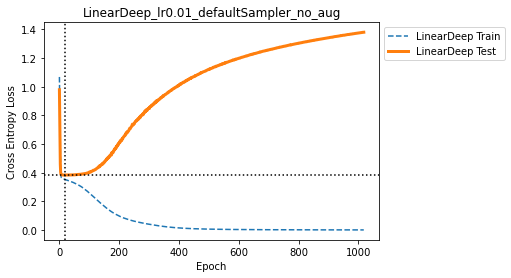

TITLE: CNN32_lr0.01_defaultSampler_no_aug


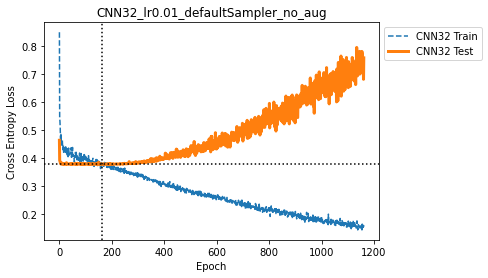

TITLE: CNN128_lr0.01_defaultSampler_no_aug


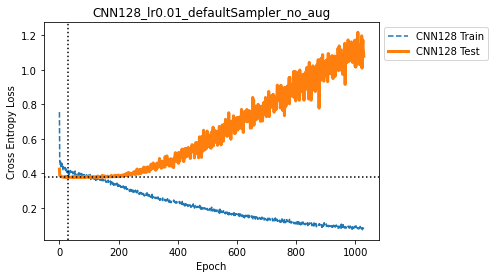

TITLE: Kmer3_lr0.01_defaultSampler_no_aug


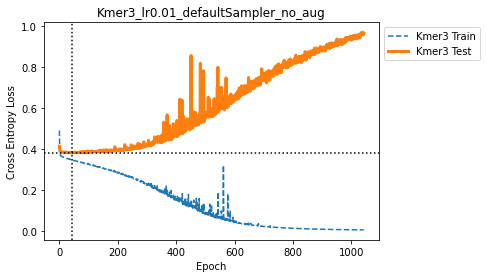

TITLE: Kmer6_lr0.01_defaultSampler_no_aug


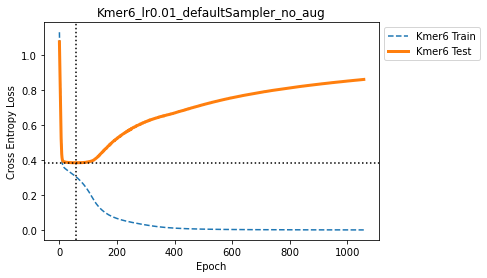

TITLE: LinearDeep_lr0.001_defaultSampler_no_aug


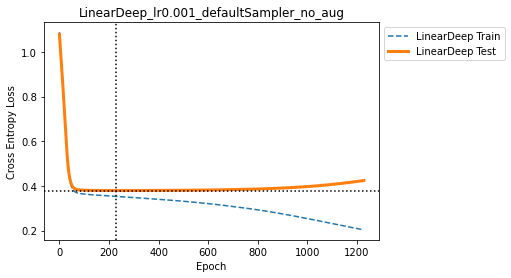

TITLE: CNN32_lr0.001_defaultSampler_no_aug


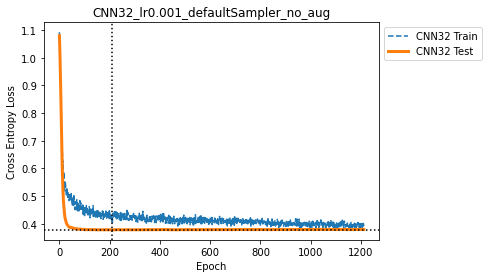

TITLE: CNN128_lr0.001_defaultSampler_no_aug


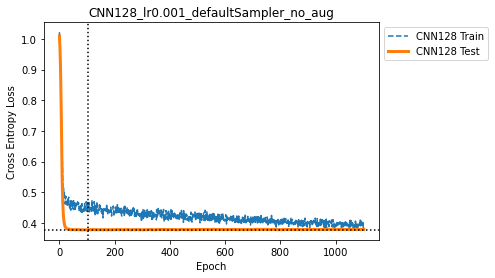

TITLE: Kmer3_lr0.001_defaultSampler_no_aug


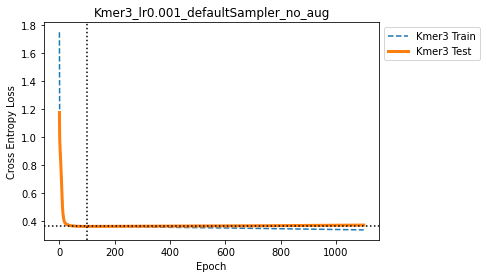

TITLE: Kmer6_lr0.001_defaultSampler_no_aug


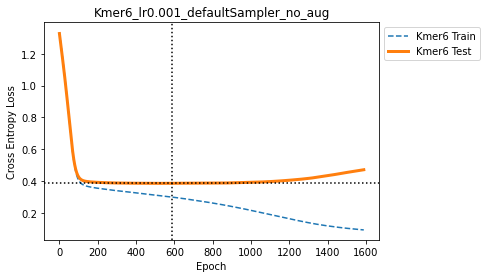

TITLE: LinearDeep_lr0.01_rebalancedSampler_no_aug


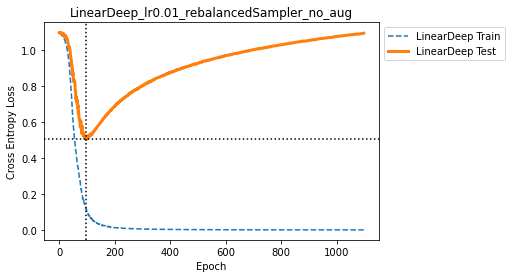

TITLE: CNN32_lr0.01_rebalancedSampler_no_aug


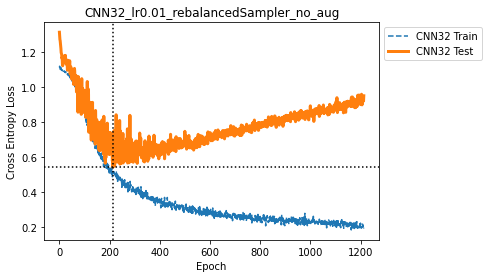

TITLE: CNN128_lr0.01_rebalancedSampler_no_aug


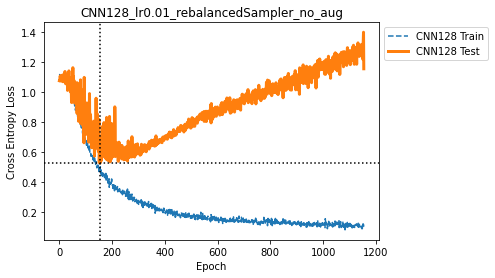

TITLE: Kmer3_lr0.01_rebalancedSampler_no_aug


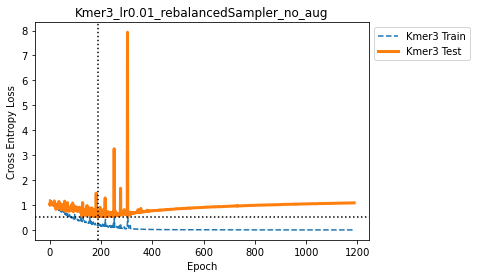

TITLE: Kmer6_lr0.01_rebalancedSampler_no_aug


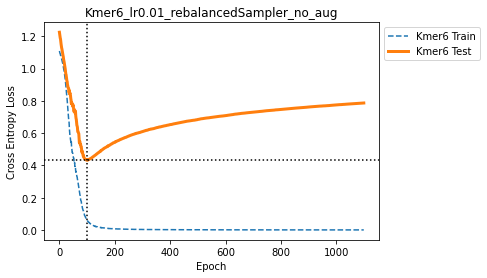

TITLE: LinearDeep_lr0.001_rebalancedSampler_no_aug


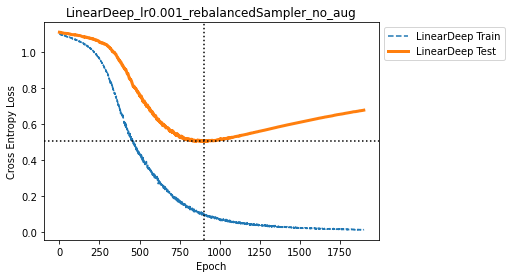

TITLE: CNN32_lr0.001_rebalancedSampler_no_aug


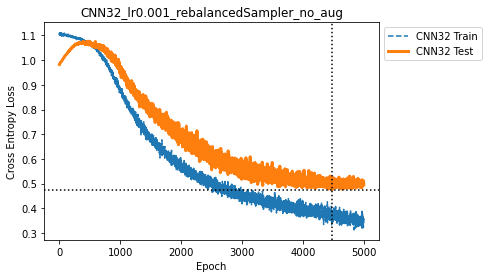

TITLE: CNN128_lr0.001_rebalancedSampler_no_aug


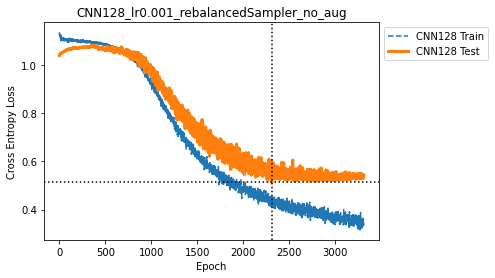

TITLE: Kmer3_lr0.001_rebalancedSampler_no_aug


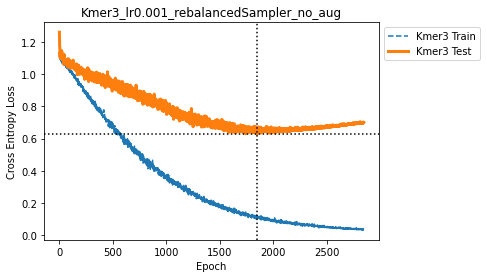

TITLE: Kmer6_lr0.001_rebalancedSampler_no_aug


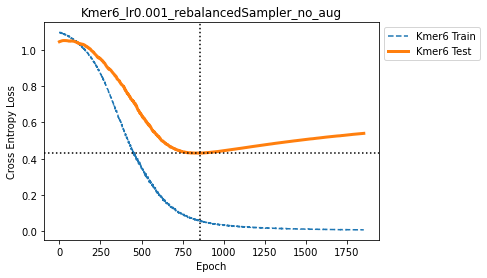

TITLE: LinearDeep_lr0.01_defaultSampler_revslide50


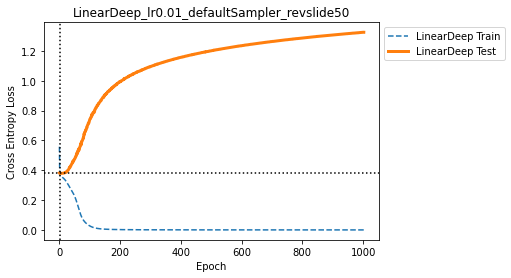

TITLE: CNN32_lr0.01_defaultSampler_revslide50


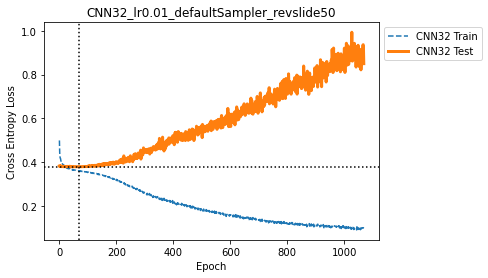

TITLE: CNN128_lr0.01_defaultSampler_revslide50


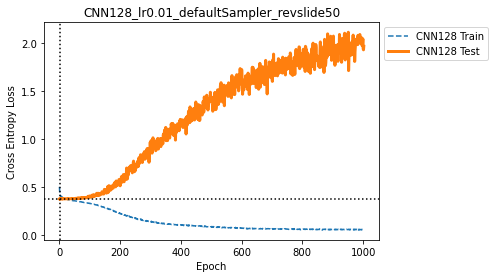

TITLE: Kmer3_lr0.01_defaultSampler_revslide50


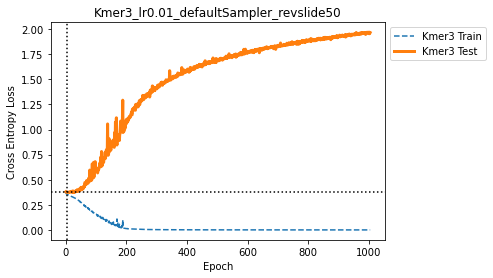

TITLE: Kmer6_lr0.01_defaultSampler_revslide50


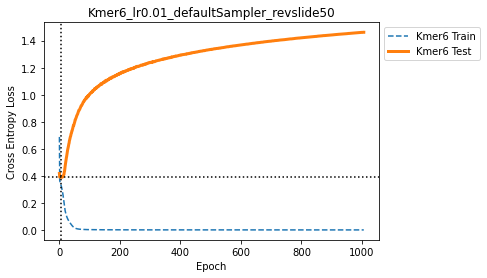

TITLE: LinearDeep_lr0.001_defaultSampler_revslide50


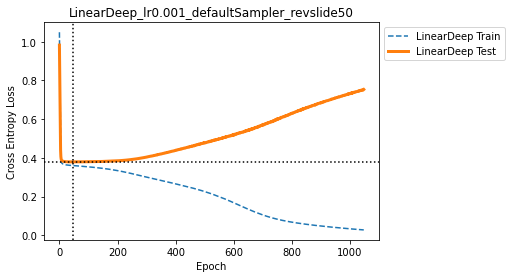

TITLE: CNN32_lr0.001_defaultSampler_revslide50


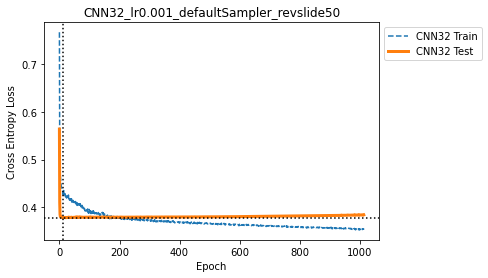

TITLE: CNN128_lr0.001_defaultSampler_revslide50


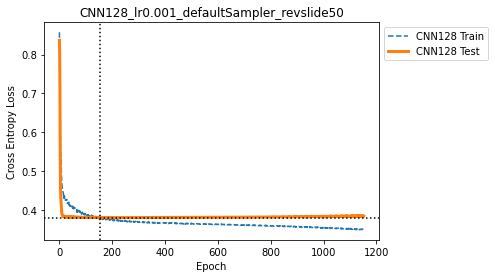

TITLE: Kmer3_lr0.001_defaultSampler_revslide50


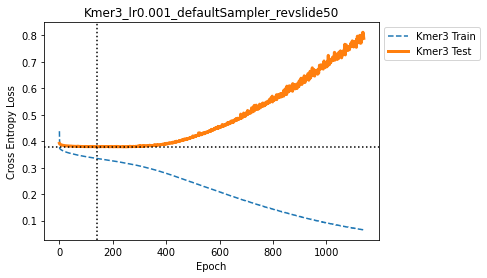

TITLE: Kmer6_lr0.001_defaultSampler_revslide50


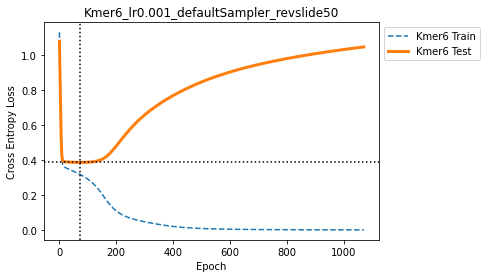

TITLE: LinearDeep_lr0.01_rebalancedSampler_revslide50


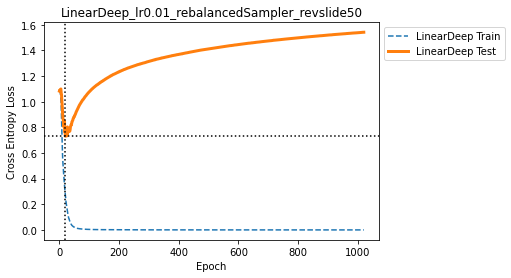

TITLE: CNN32_lr0.01_rebalancedSampler_revslide50


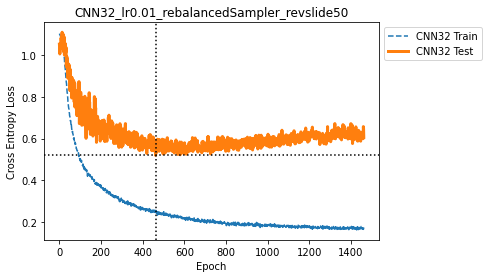

TITLE: CNN128_lr0.01_rebalancedSampler_revslide50


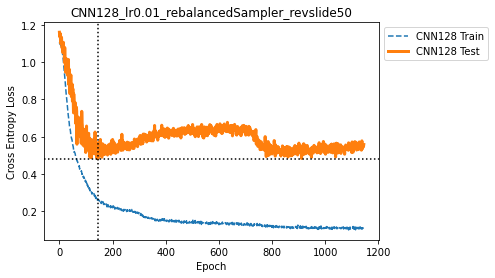

TITLE: Kmer3_lr0.01_rebalancedSampler_revslide50


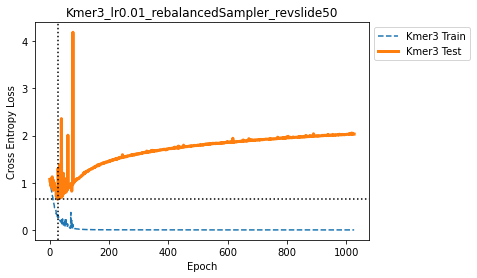

TITLE: Kmer6_lr0.01_rebalancedSampler_revslide50


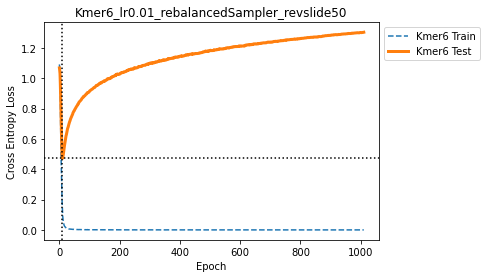

TITLE: LinearDeep_lr0.001_rebalancedSampler_revslide50


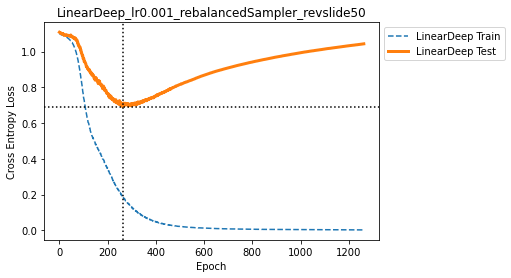

TITLE: CNN32_lr0.001_rebalancedSampler_revslide50


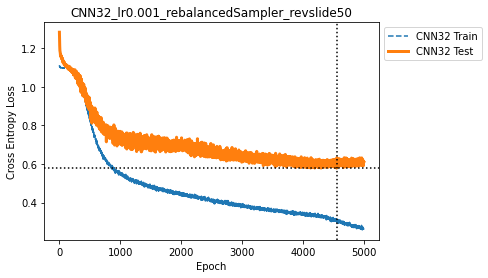

TITLE: CNN128_lr0.001_rebalancedSampler_revslide50


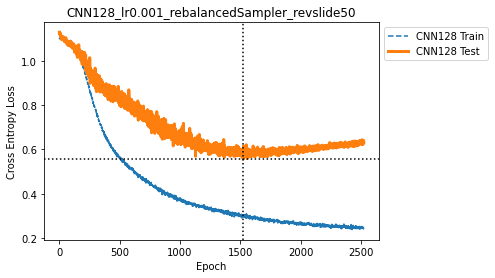

TITLE: Kmer3_lr0.001_rebalancedSampler_revslide50


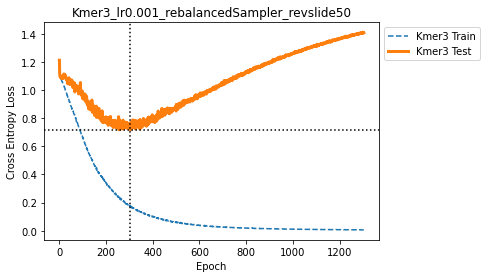

TITLE: Kmer6_lr0.001_rebalancedSampler_revslide50


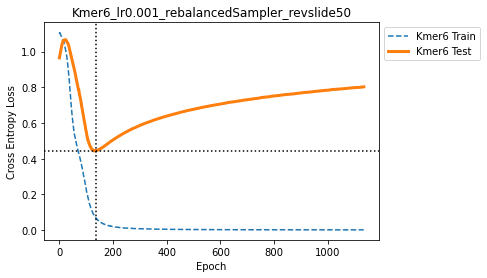

TITLE: LinearDeep_lr0.01_defaultSampler_mutation0.03


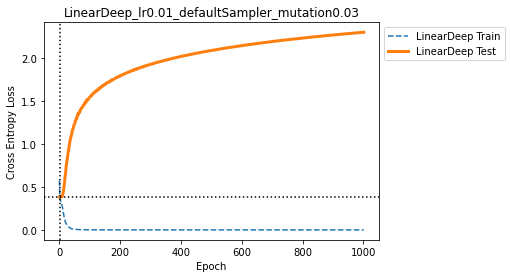

TITLE: CNN32_lr0.01_defaultSampler_mutation0.03


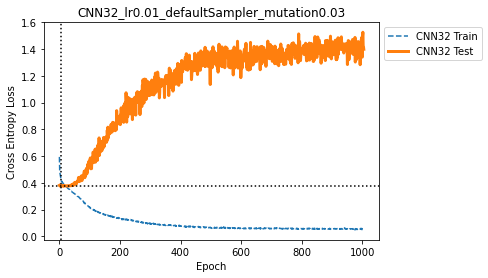

TITLE: CNN128_lr0.01_defaultSampler_mutation0.03


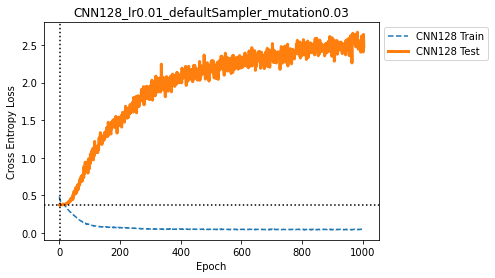

TITLE: Kmer3_lr0.01_defaultSampler_mutation0.03


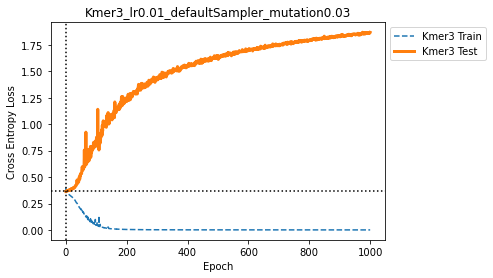

TITLE: Kmer6_lr0.01_defaultSampler_mutation0.03


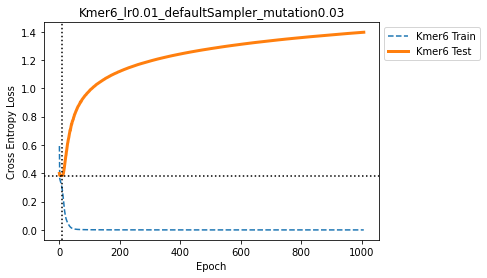

TITLE: LinearDeep_lr0.001_defaultSampler_mutation0.03


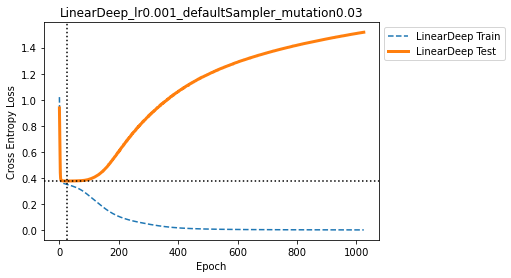

TITLE: CNN32_lr0.001_defaultSampler_mutation0.03


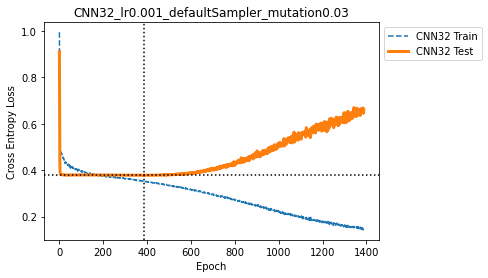

TITLE: CNN128_lr0.001_defaultSampler_mutation0.03


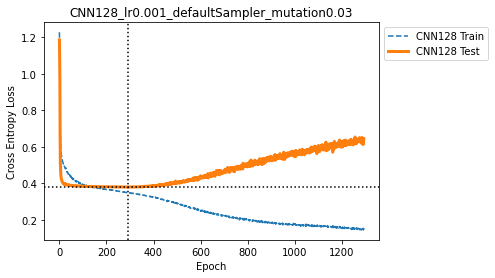

TITLE: Kmer3_lr0.001_defaultSampler_mutation0.03


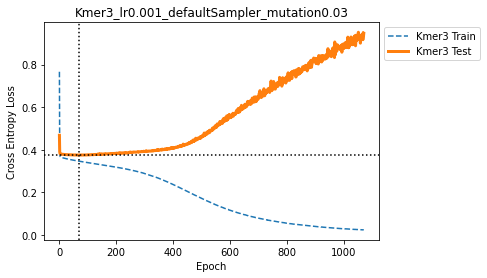

TITLE: Kmer6_lr0.001_defaultSampler_mutation0.03


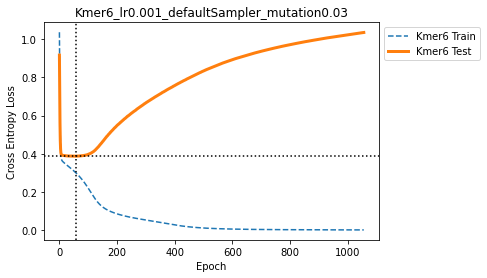

TITLE: LinearDeep_lr0.01_rebalancedSampler_mutation0.03


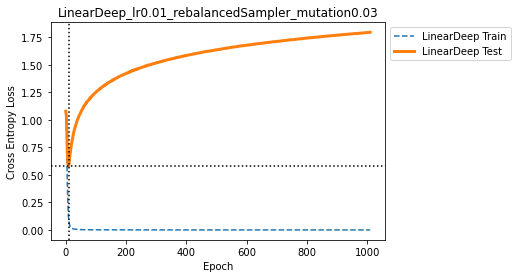

TITLE: CNN32_lr0.01_rebalancedSampler_mutation0.03


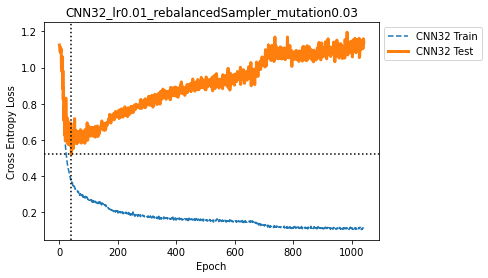

TITLE: CNN128_lr0.01_rebalancedSampler_mutation0.03


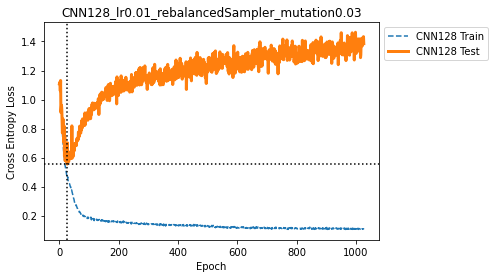

TITLE: Kmer3_lr0.01_rebalancedSampler_mutation0.03


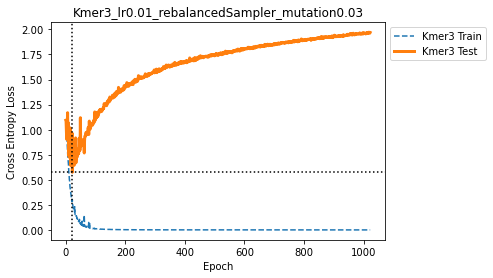

TITLE: Kmer6_lr0.01_rebalancedSampler_mutation0.03


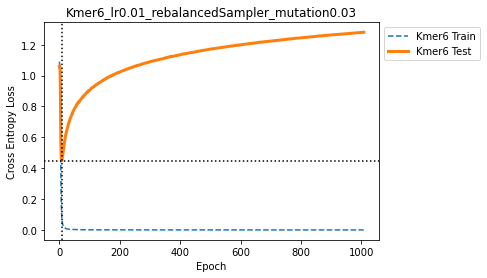

TITLE: LinearDeep_lr0.001_rebalancedSampler_mutation0.03


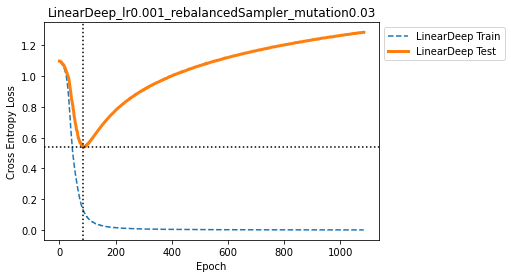

TITLE: CNN32_lr0.001_rebalancedSampler_mutation0.03


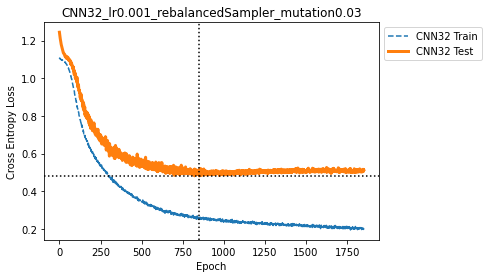

TITLE: CNN128_lr0.001_rebalancedSampler_mutation0.03


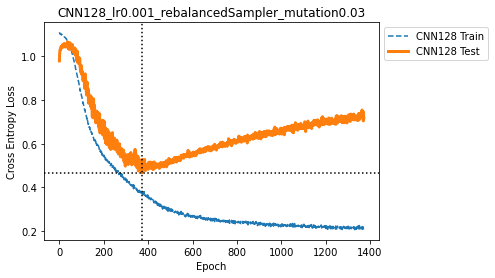

TITLE: Kmer3_lr0.001_rebalancedSampler_mutation0.03


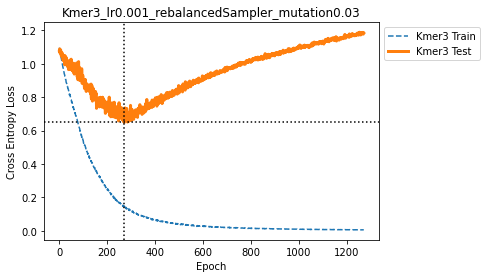

TITLE: Kmer6_lr0.001_rebalancedSampler_mutation0.03


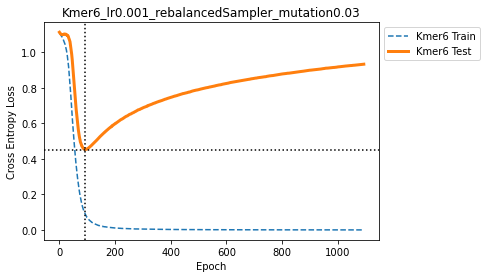

TITLE: LinearDeep_lr0.01_defaultSampler_mutation0.1


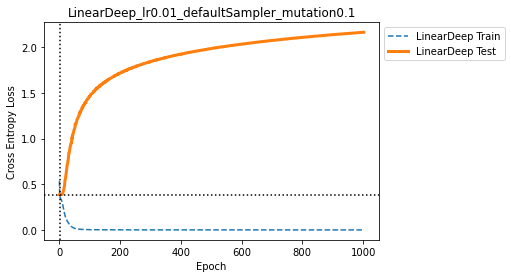

TITLE: CNN32_lr0.01_defaultSampler_mutation0.1


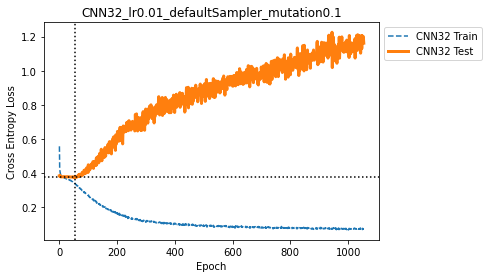

TITLE: CNN128_lr0.01_defaultSampler_mutation0.1


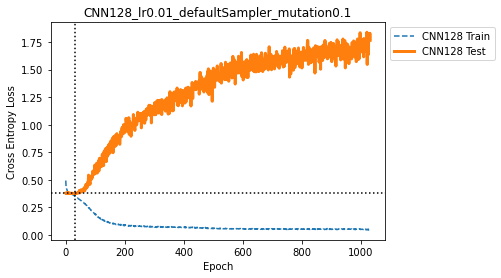

TITLE: Kmer3_lr0.01_defaultSampler_mutation0.1


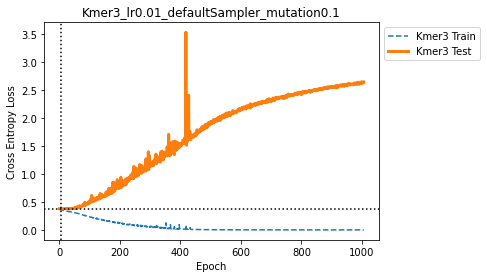

TITLE: Kmer6_lr0.01_defaultSampler_mutation0.1


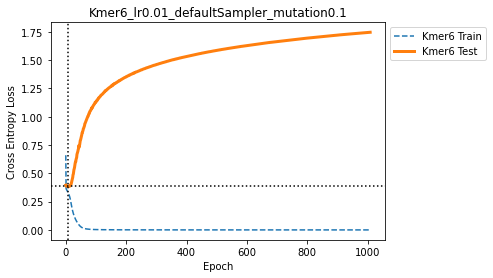

TITLE: LinearDeep_lr0.001_defaultSampler_mutation0.1


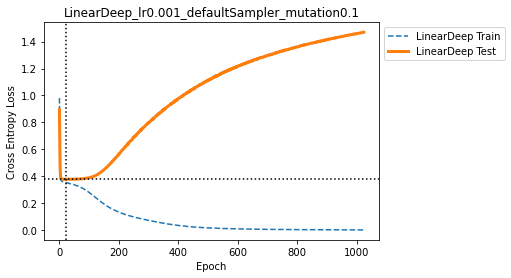

TITLE: CNN32_lr0.001_defaultSampler_mutation0.1


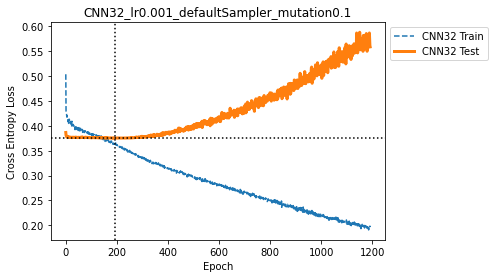

TITLE: CNN128_lr0.001_defaultSampler_mutation0.1


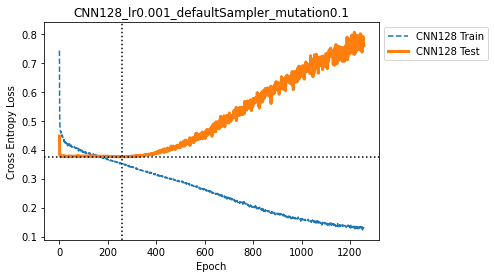

TITLE: Kmer3_lr0.001_defaultSampler_mutation0.1


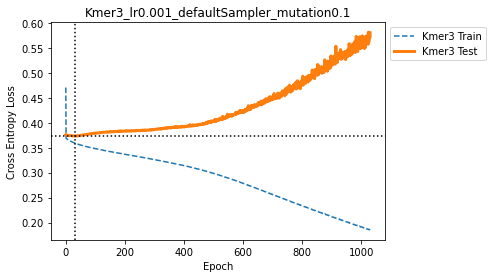

TITLE: Kmer6_lr0.001_defaultSampler_mutation0.1


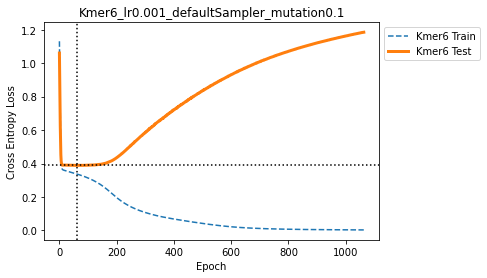

TITLE: LinearDeep_lr0.01_rebalancedSampler_mutation0.1


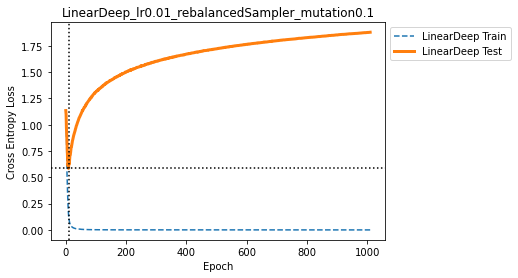

TITLE: CNN32_lr0.01_rebalancedSampler_mutation0.1


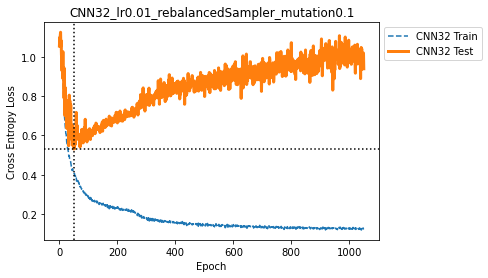

TITLE: CNN128_lr0.01_rebalancedSampler_mutation0.1


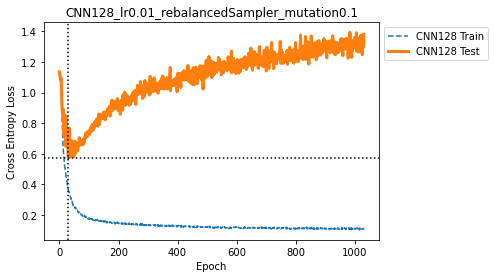

TITLE: Kmer3_lr0.01_rebalancedSampler_mutation0.1


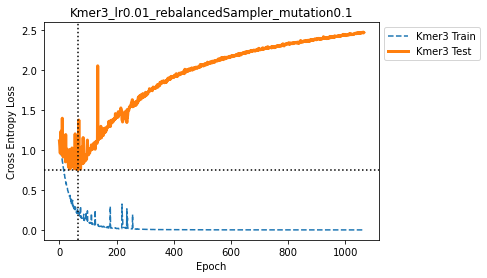

TITLE: Kmer6_lr0.01_rebalancedSampler_mutation0.1


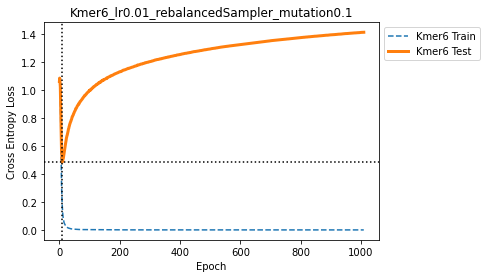

TITLE: LinearDeep_lr0.001_rebalancedSampler_mutation0.1


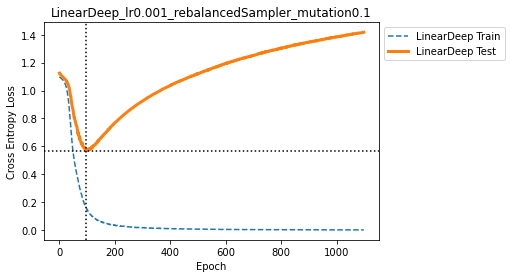

TITLE: CNN32_lr0.001_rebalancedSampler_mutation0.1


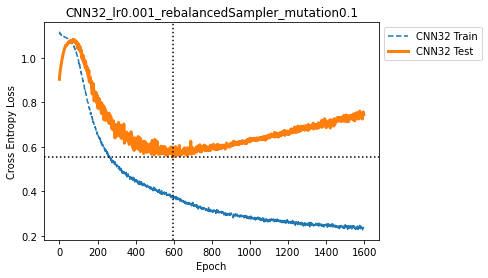

TITLE: CNN128_lr0.001_rebalancedSampler_mutation0.1


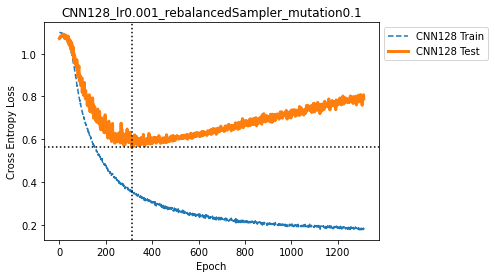

TITLE: Kmer3_lr0.001_rebalancedSampler_mutation0.1


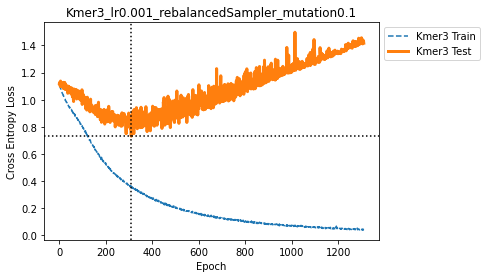

TITLE: Kmer6_lr0.001_rebalancedSampler_mutation0.1


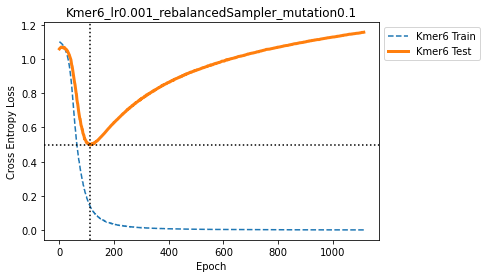

TITLE: LSTM_lr0.01_defaultSampler_no_aug


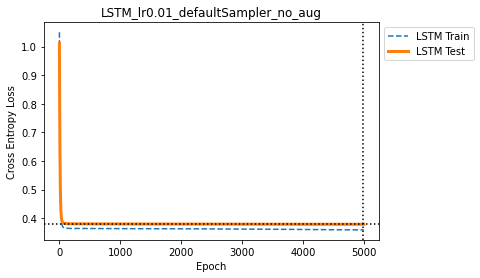

TITLE: CNNLSTM_lr0.01_defaultSampler_no_aug


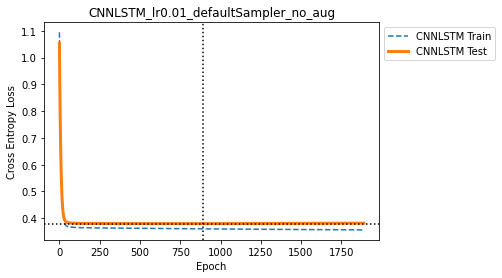

TITLE: LSTM_lr0.001_defaultSampler_no_aug


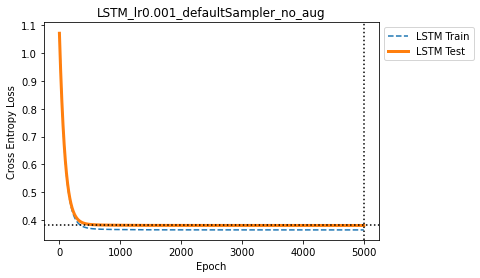

TITLE: CNNLSTM_lr0.001_defaultSampler_no_aug


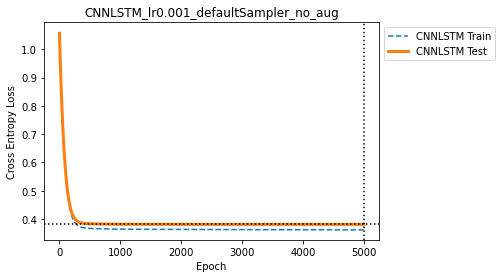

TITLE: LSTM_lr0.01_rebalancedSampler_no_aug


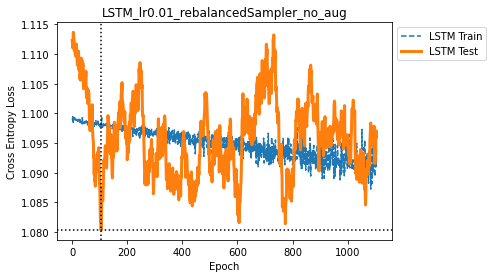

TITLE: CNNLSTM_lr0.01_rebalancedSampler_no_aug


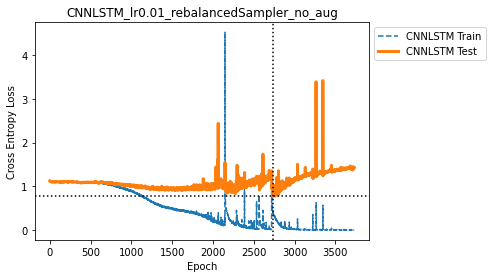

TITLE: LSTM_lr0.001_rebalancedSampler_no_aug


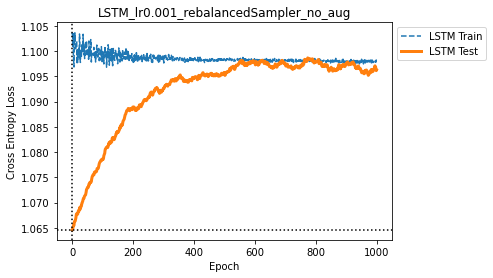

TITLE: CNNLSTM_lr0.001_rebalancedSampler_no_aug


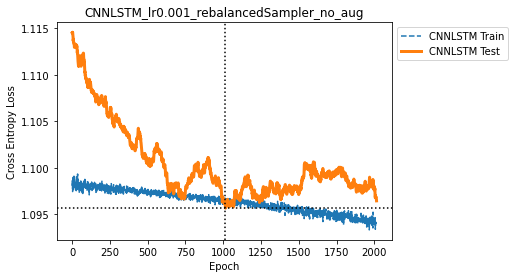

TITLE: LSTM_lr0.01_defaultSampler_revslide50


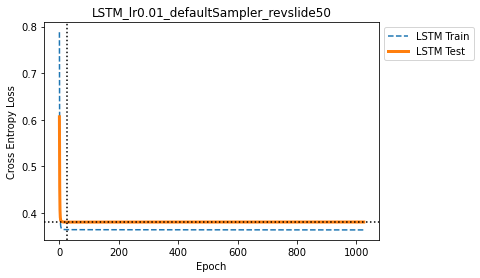

TITLE: CNNLSTM_lr0.01_defaultSampler_revslide50


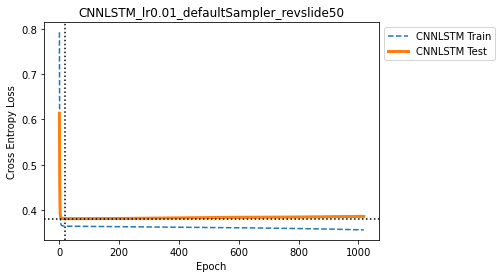

TITLE: LSTM_lr0.001_defaultSampler_revslide50


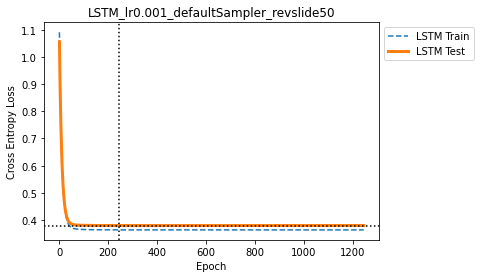

TITLE: CNNLSTM_lr0.001_defaultSampler_revslide50


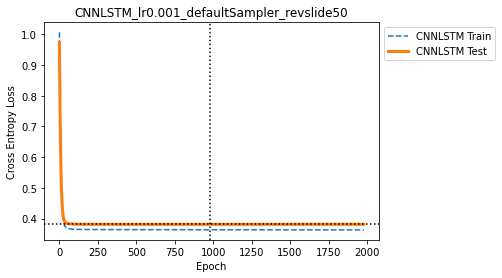

TITLE: LSTM_lr0.01_rebalancedSampler_revslide50


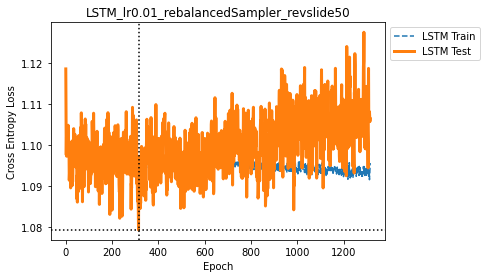

TITLE: CNNLSTM_lr0.01_rebalancedSampler_revslide50


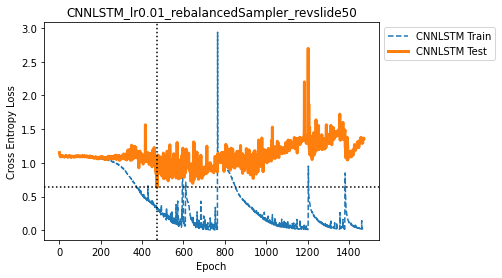

TITLE: LSTM_lr0.001_rebalancedSampler_revslide50


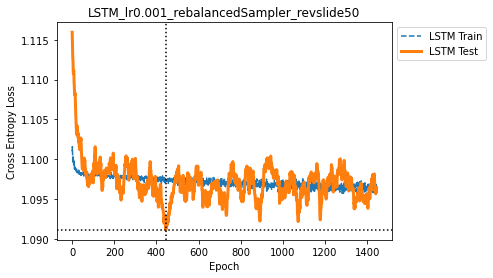

TITLE: CNNLSTM_lr0.001_rebalancedSampler_revslide50


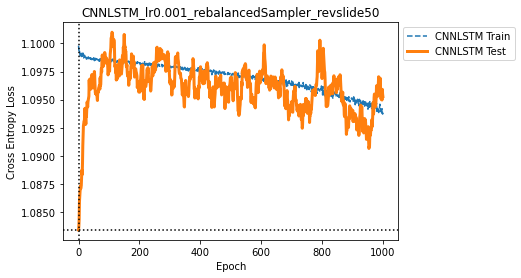

TITLE: LSTM_lr0.01_defaultSampler_mutation0.03


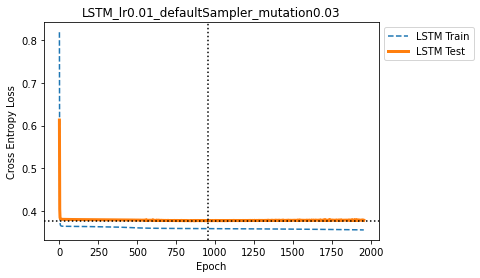

TITLE: CNNLSTM_lr0.01_defaultSampler_mutation0.03


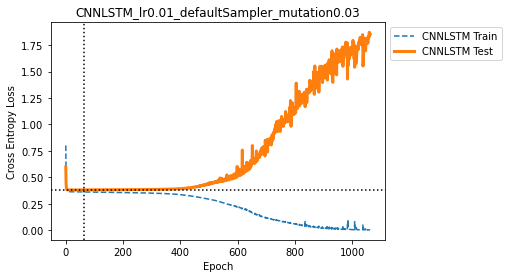

TITLE: LSTM_lr0.001_defaultSampler_mutation0.03


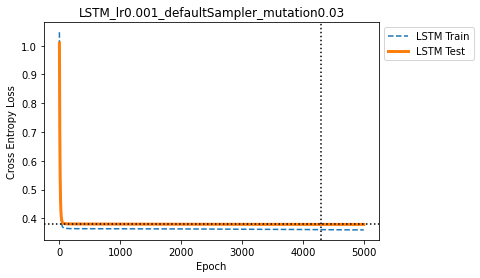

TITLE: CNNLSTM_lr0.001_defaultSampler_mutation0.03


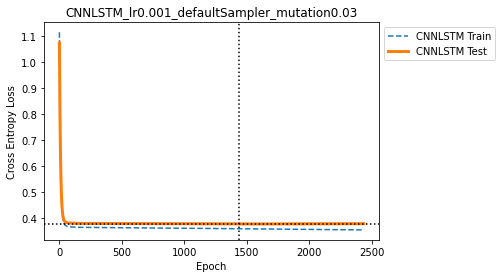

TITLE: LSTM_lr0.01_rebalancedSampler_mutation0.03


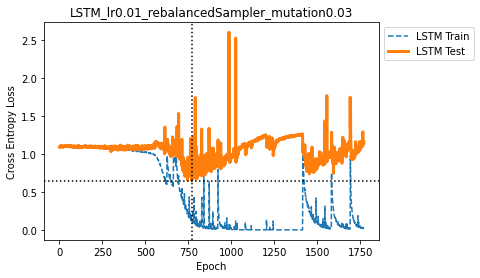

TITLE: CNNLSTM_lr0.01_rebalancedSampler_mutation0.03


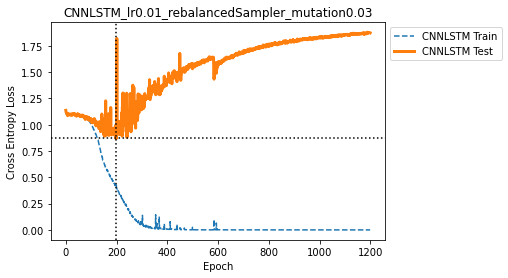

TITLE: LSTM_lr0.001_rebalancedSampler_mutation0.03


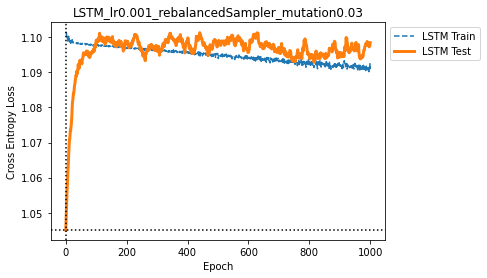

TITLE: CNNLSTM_lr0.001_rebalancedSampler_mutation0.03


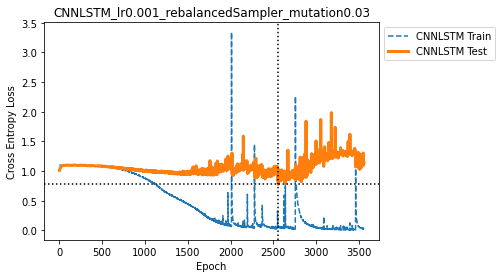

TITLE: LSTM_lr0.01_defaultSampler_mutation0.1


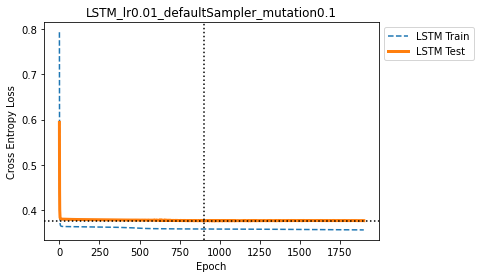

TITLE: CNNLSTM_lr0.01_defaultSampler_mutation0.1


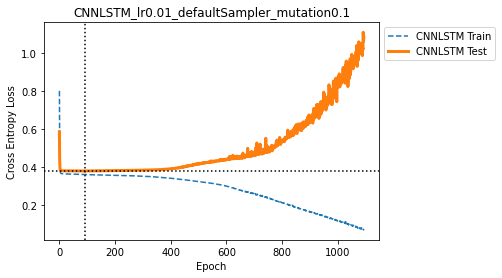

TITLE: LSTM_lr0.001_defaultSampler_mutation0.1


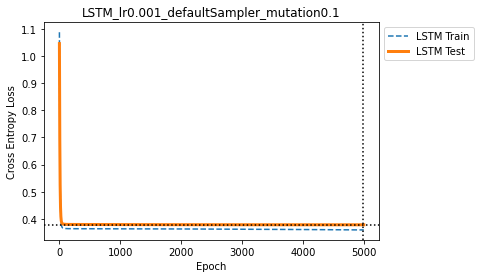

TITLE: CNNLSTM_lr0.001_defaultSampler_mutation0.1


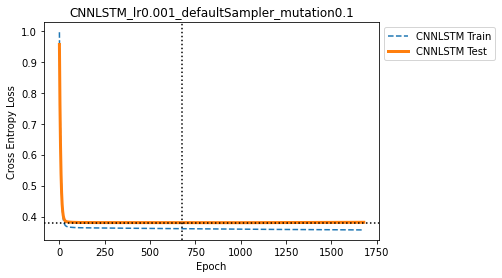

TITLE: LSTM_lr0.01_rebalancedSampler_mutation0.1


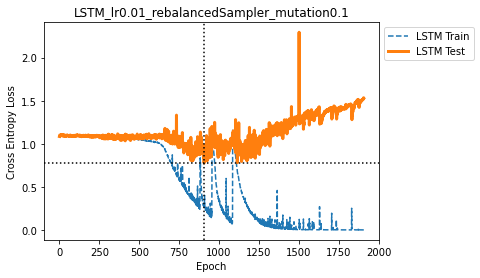

TITLE: CNNLSTM_lr0.01_rebalancedSampler_mutation0.1


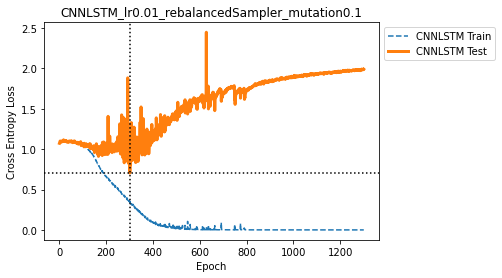

TITLE: LSTM_lr0.001_rebalancedSampler_mutation0.1


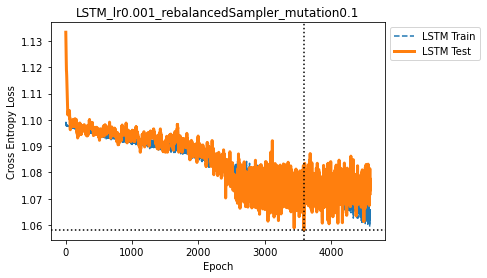

TITLE: CNNLSTM_lr0.001_rebalancedSampler_mutation0.1


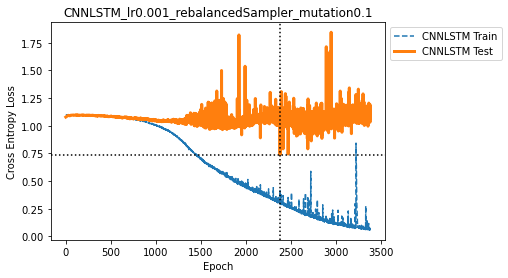

In [86]:
traces = []
for m in loss_dict:
#     train_losses = loss_dict[m]['train_losses']
#     val_losses = loss_dict[m]['val_losses']
#     estop = loss_dict[m]['estop']
#     best_val_loss = loss_dict[m]['best_val_loss']
    data_label = loss_dict[m]['data_label']
    
    #info = ((train_losses,val_losses),estop, best_val_loss, data_label)
    traces.append(data_label)
    
    print(f"TITLE: {m}")
    quick_loss_plot(data_label,m,loss_type="Cross Entropy Loss")

# confusion matrices

In [89]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [118]:
train_f = 'pipe0/conf_dfs/CNN32_lr0.01_rebalancedSampler_mutation0.03_train_conf_df.tsv'
val_f = 'pipe0/conf_dfs/CNN32_lr0.01_rebalancedSampler_mutation0.03_val_conf_df.tsv'
train_df = pd.read_csv(train_f,sep='\t')
val_df = pd.read_csv(val_f,sep='\t')

In [160]:
def plot_conf_matrix_paired(dfs, name):
    
    mats = []
    #[(c,"Raw Confusion Matrix"), (cp,"Normalized Confusion Matrix")]

    for df,df_name in dfs:
        # make confusion matrix
        c = confusion_matrix(df['truth'].values, df['pred'].values)
        # make normalized confusion matrix
        cp = np.zeros(c.shape)
        for i,row in enumerate(c):
            rowsum = sum(row)
            for j,item in enumerate(row):
                val = item/rowsum
                cp[i][j] = val
        
        mats.append((c,f"{df_name} conf (raw)"))
        mats.append((cp,f"{df_name} conf (norm)"))
    
    # create figure
    

    
    f, axes = plt.subplots(2, 2, figsize=(10, 8))#, sharey='row')
    axes_list = [item for sublist in axes for item in sublist] 

    for i, (mat,title) in enumerate(mats):
        disp = ConfusionMatrixDisplay(confusion_matrix=mat)
        disp.plot(ax=axes_list.pop(0))
        disp.ax_.set_title(title)

#         if i!=0:
#             disp.ax_.set_ylabel('')

    f.suptitle(name,fontsize=20)
    #plt.show()
    plt.tight_layout()

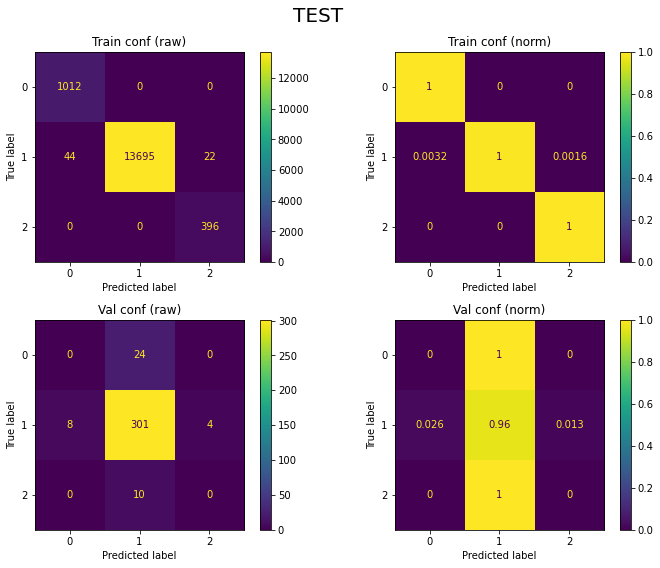

In [162]:
dfs = [(train_df,"Train"),(val_df,"Val")]
#dfs = [(train_df,"Train")]#,(val_df,"Val")]
plot_conf_matrix_paired(dfs, "TEST")

In [163]:
# loop through dir
for 

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


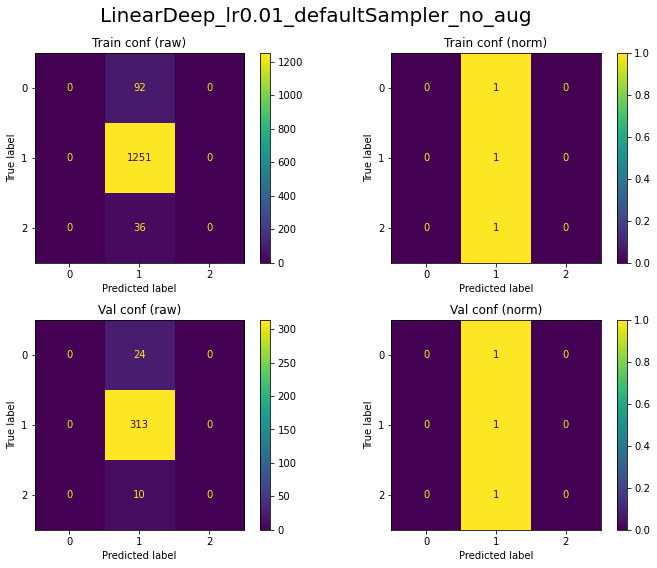

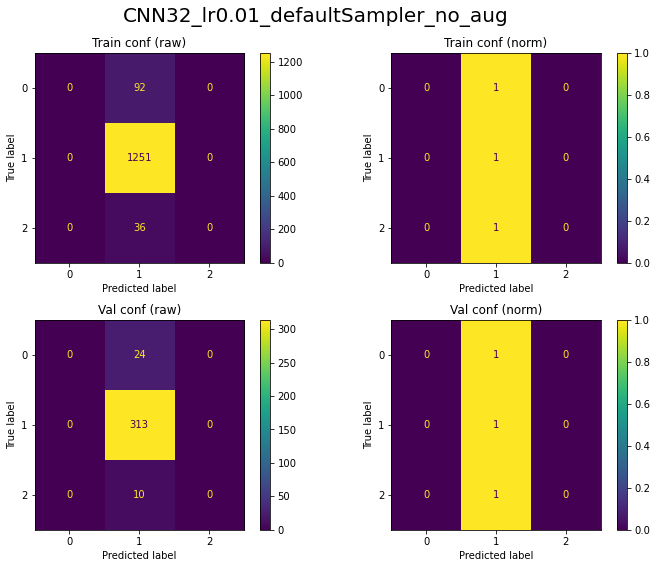

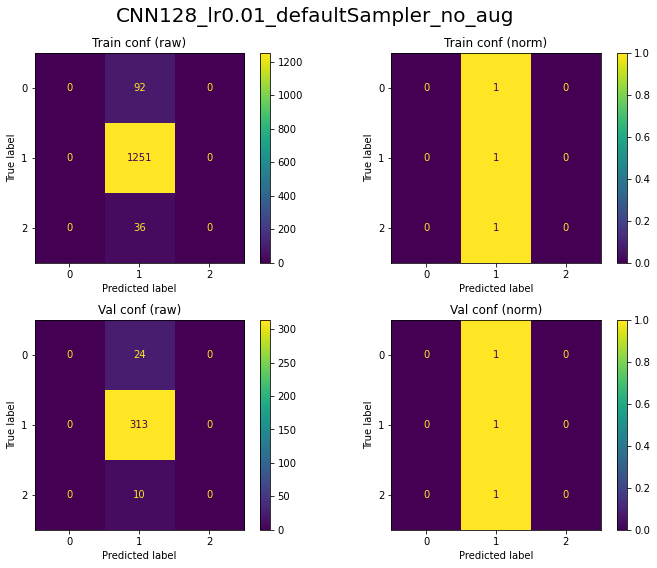

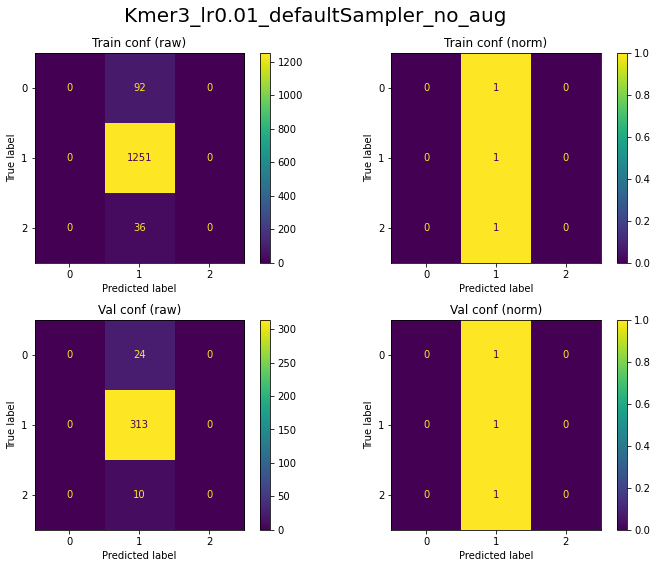

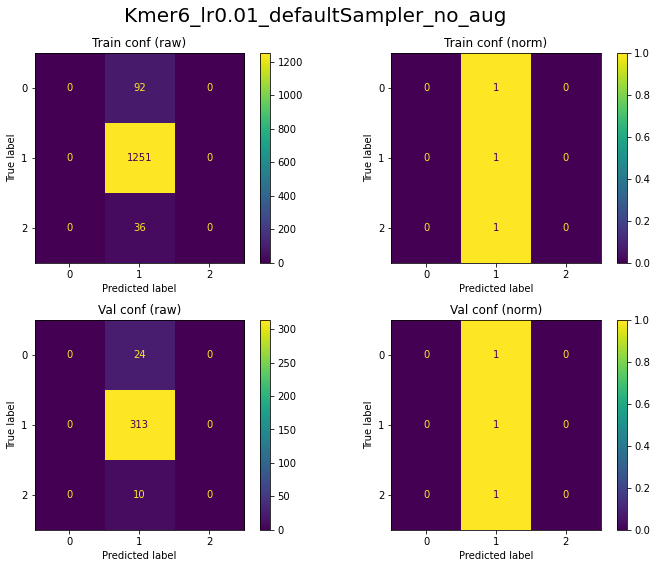

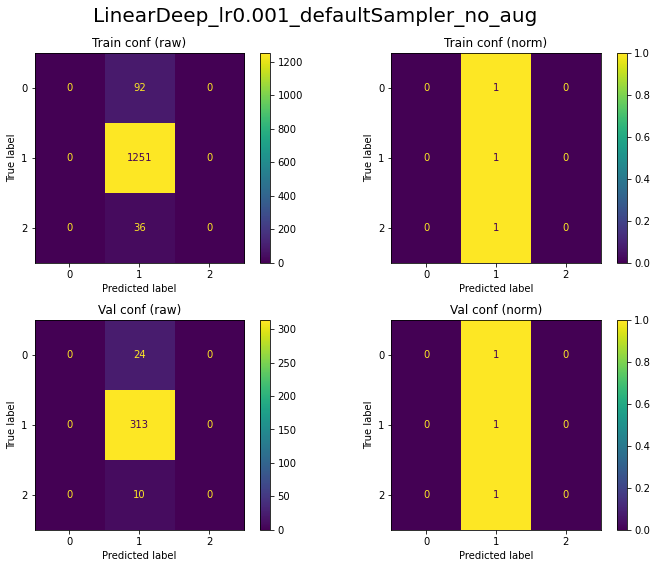

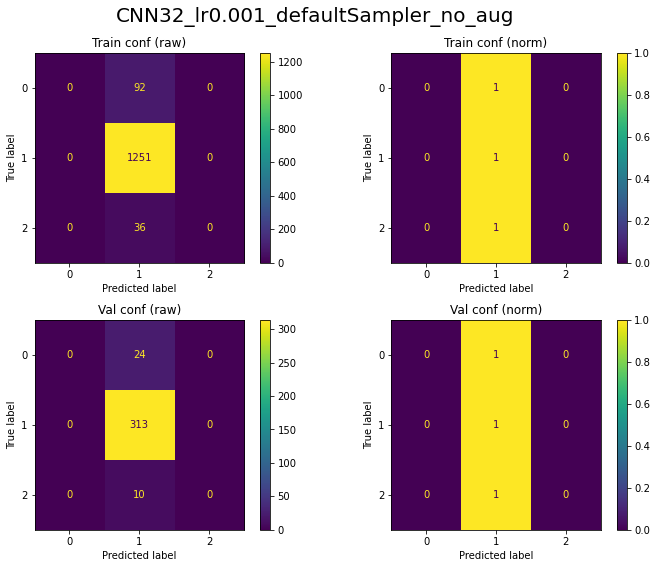

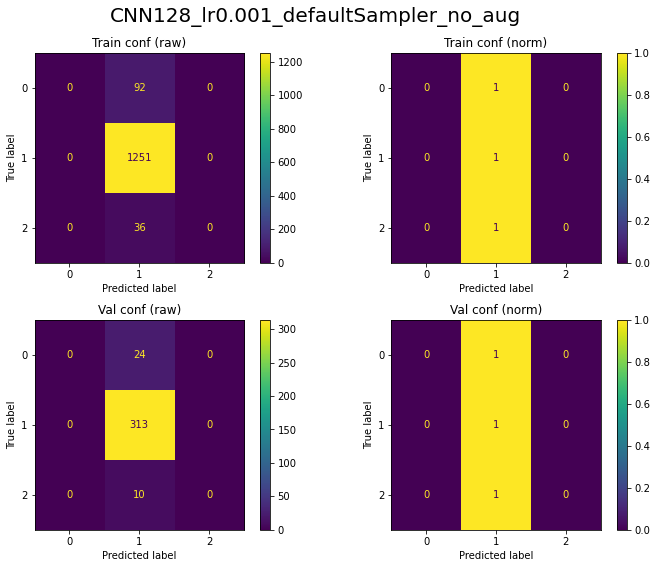

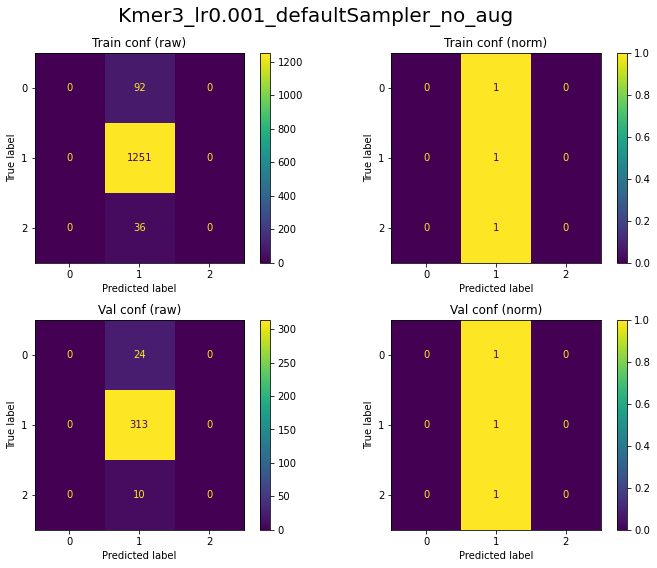

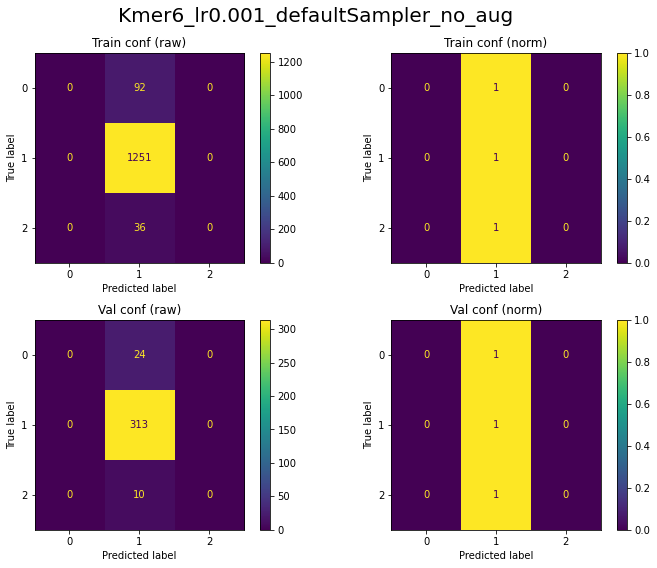

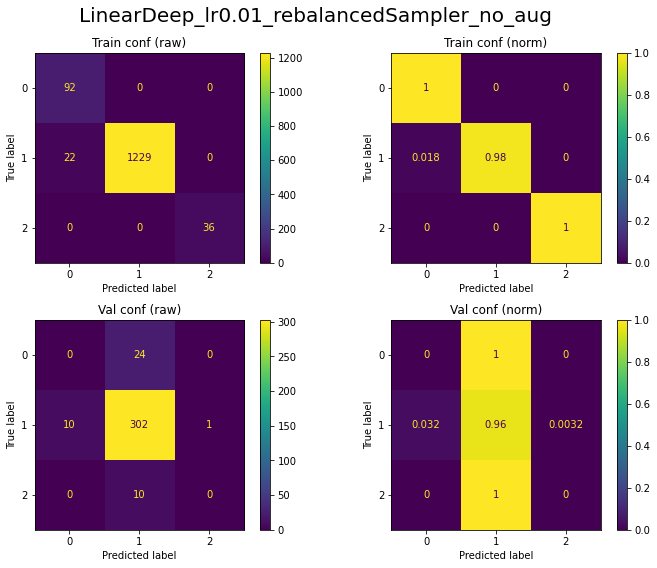

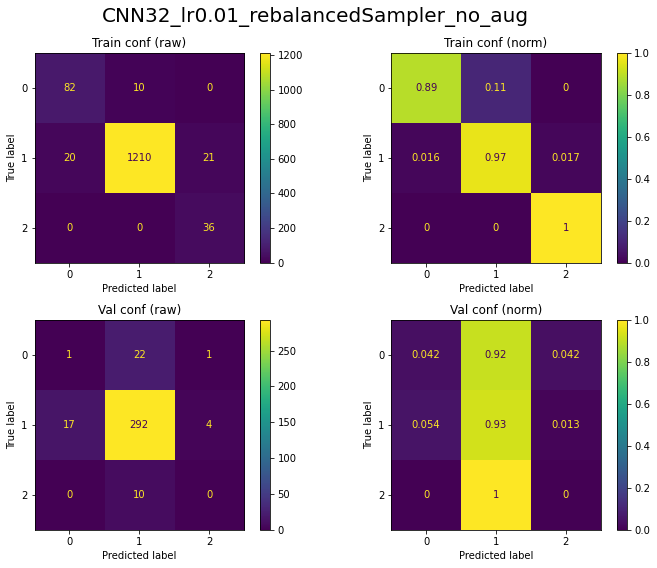

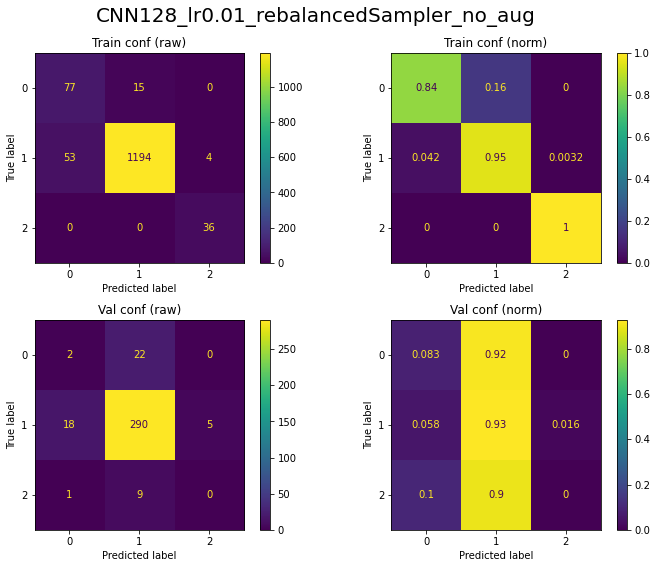

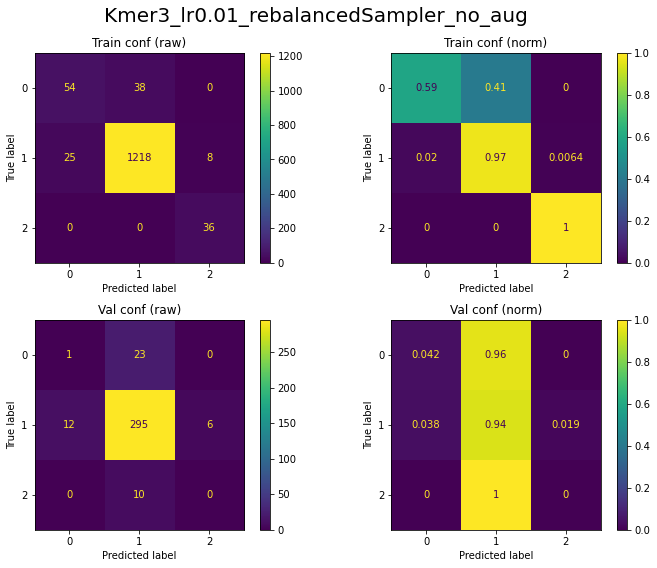

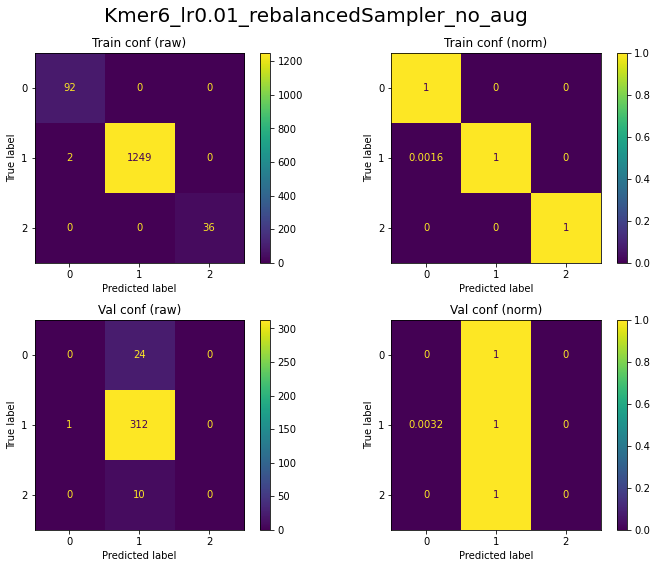

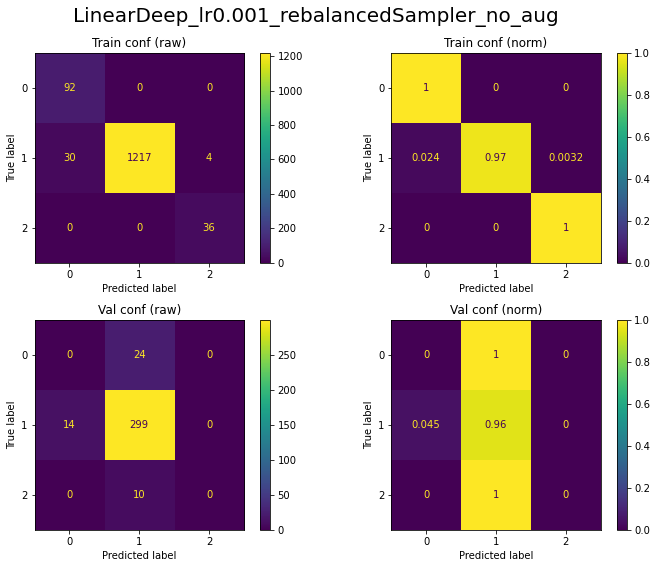

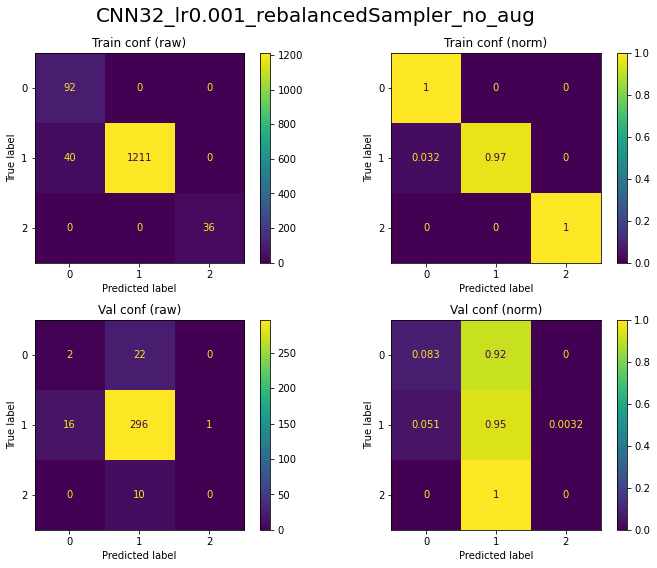

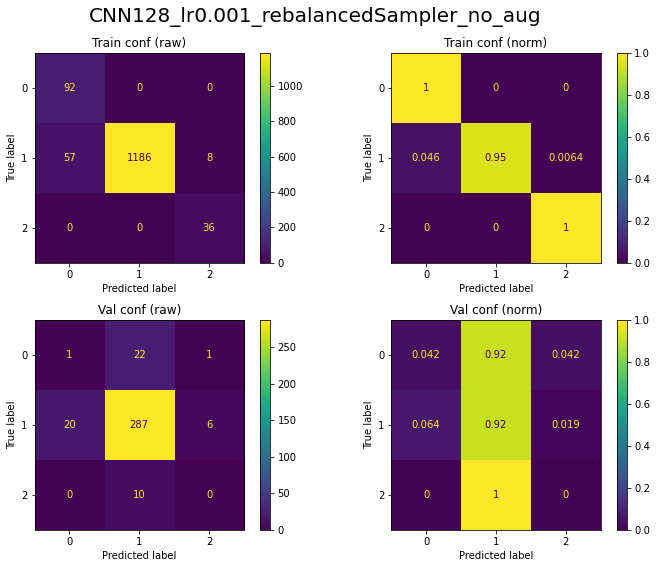

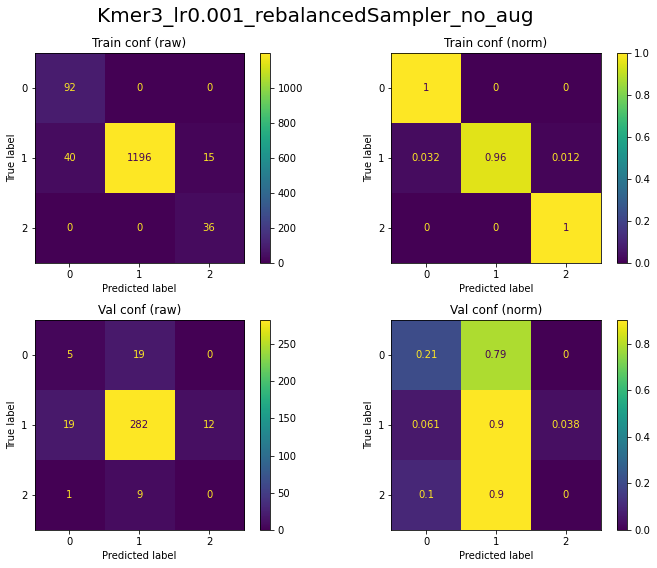

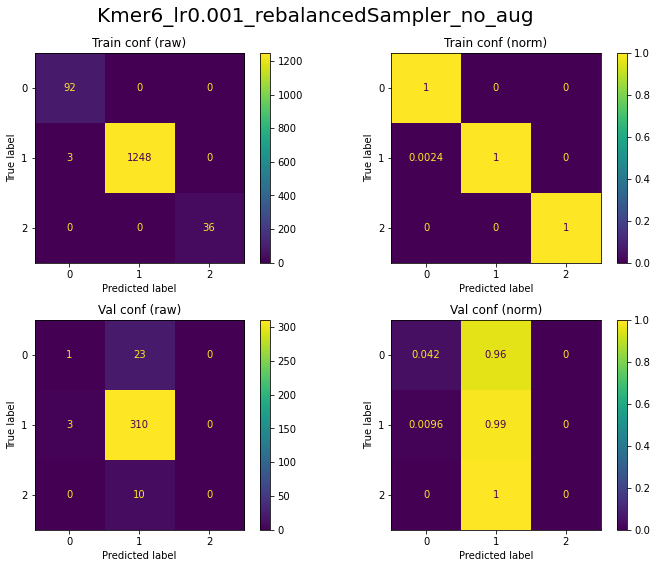

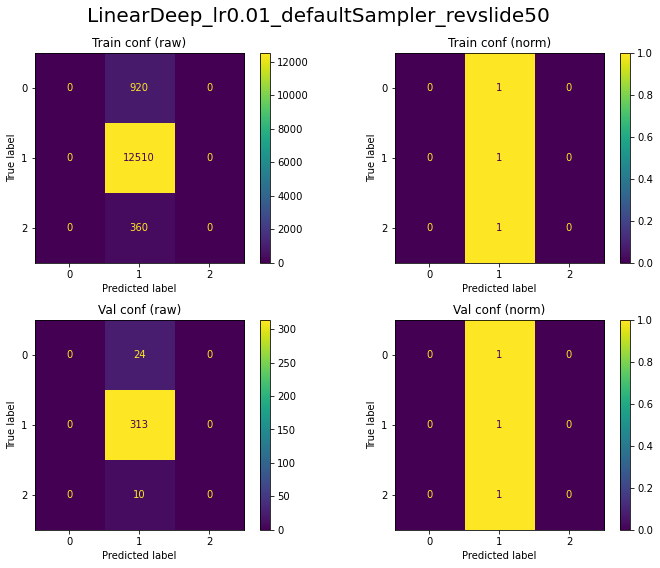

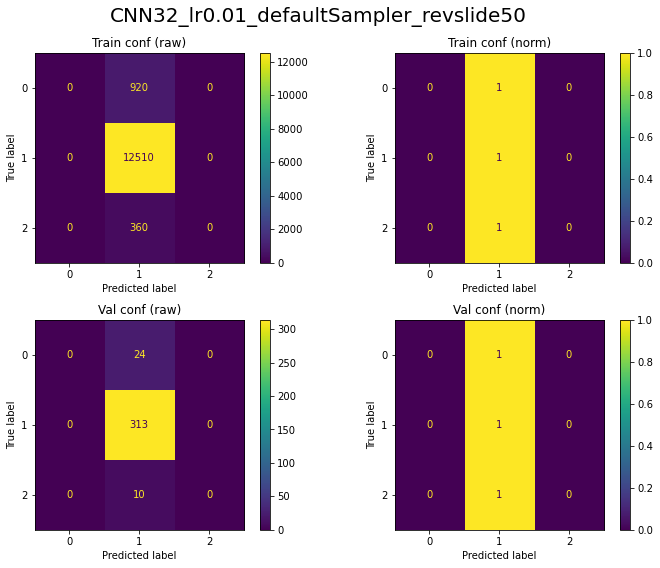

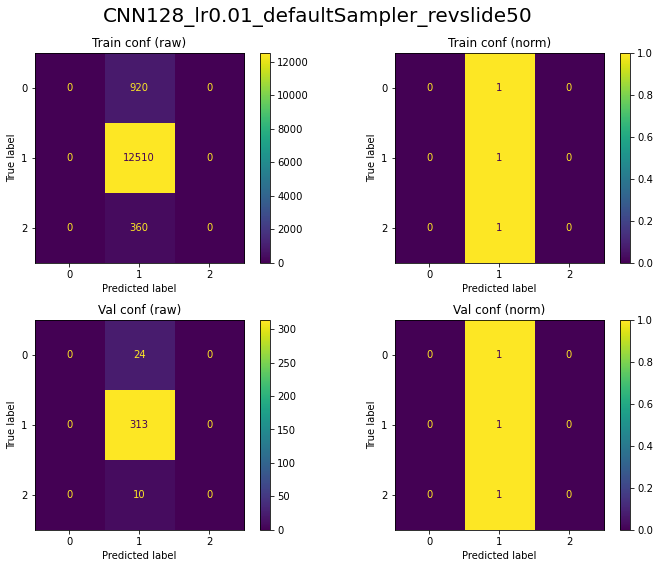

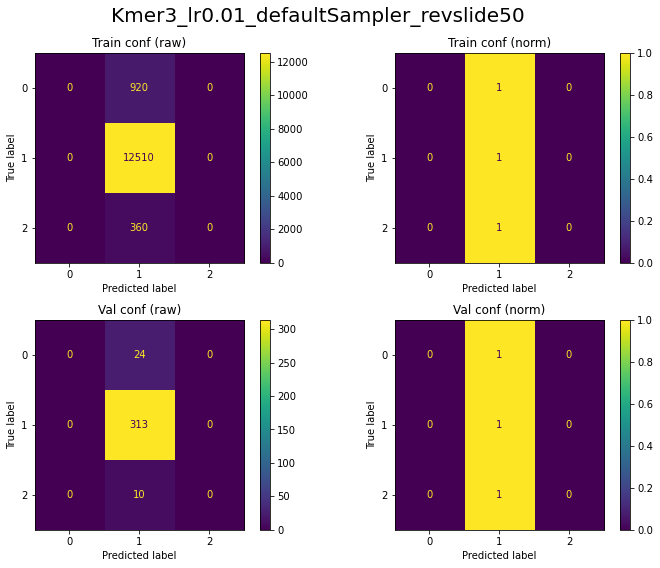

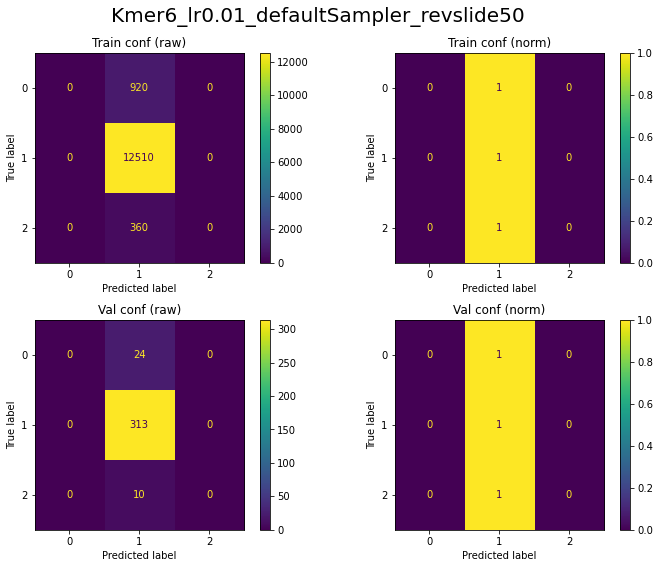

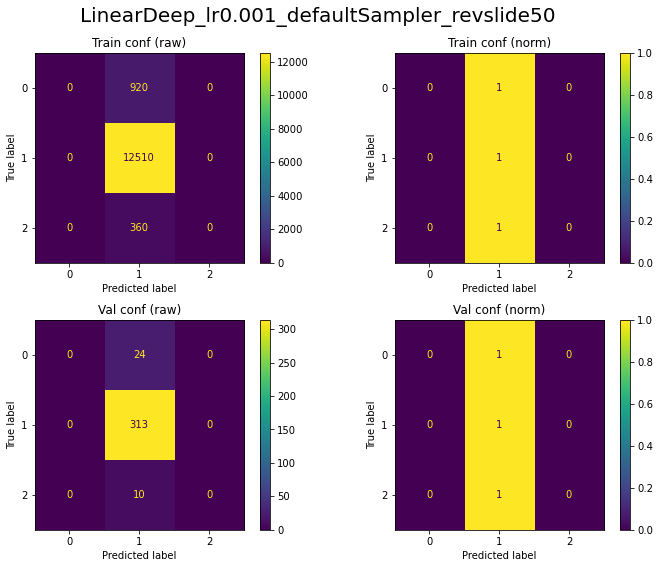

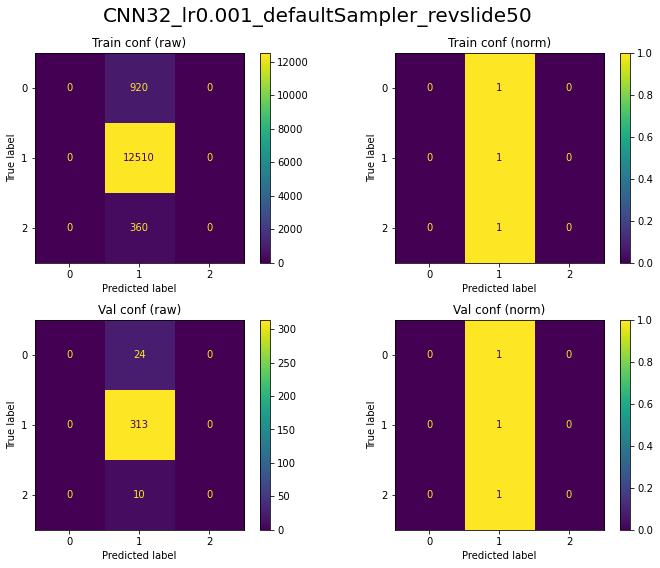

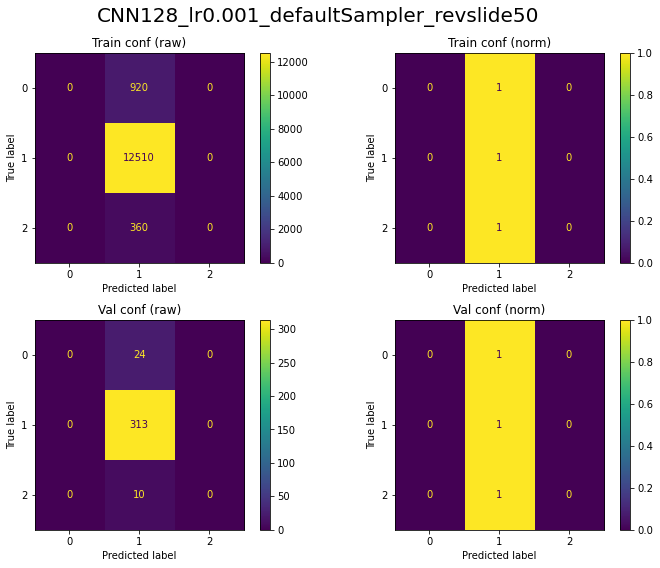

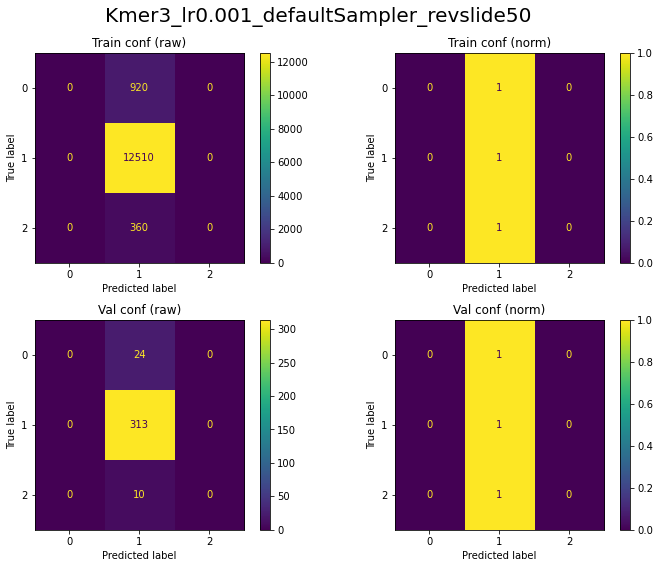

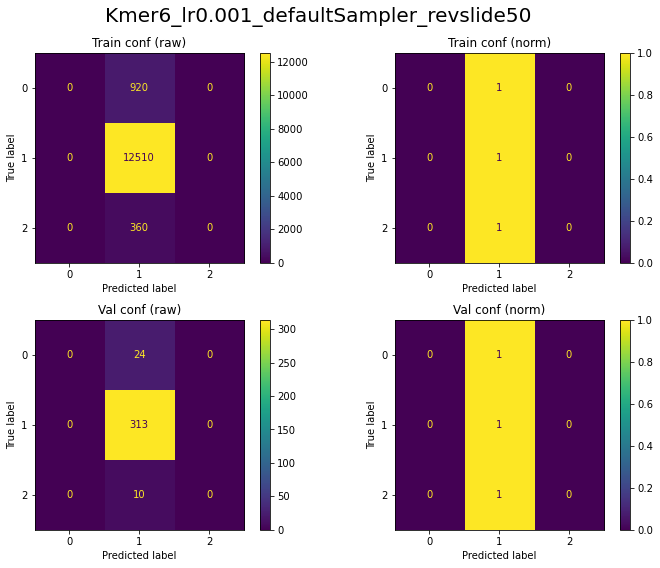

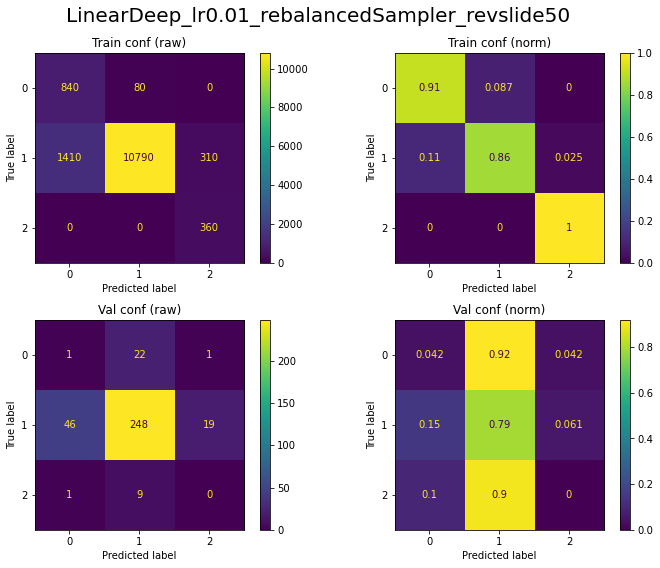

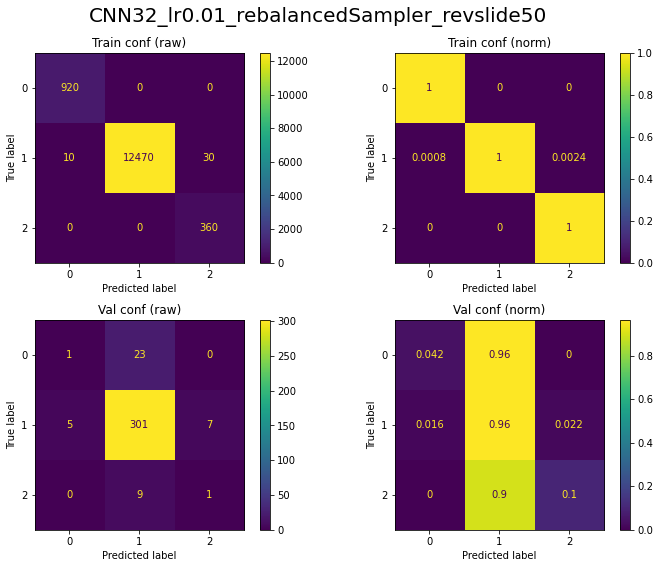

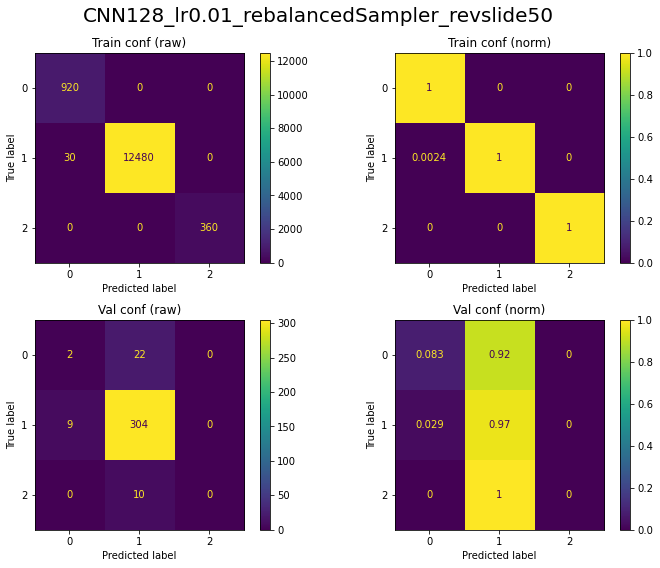

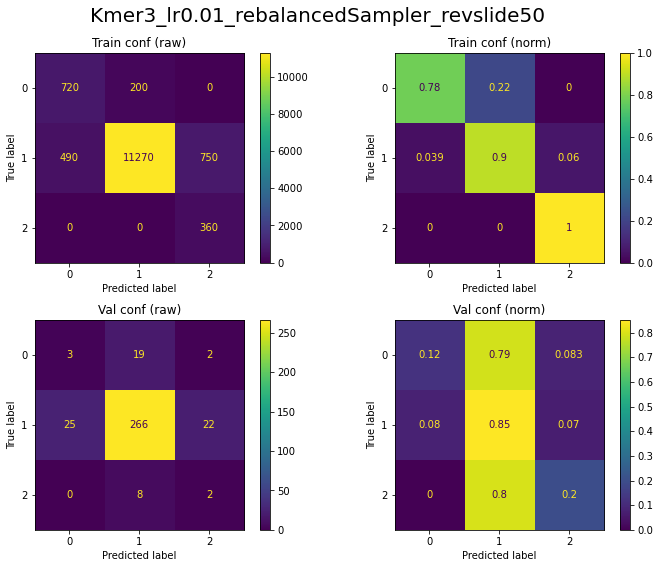

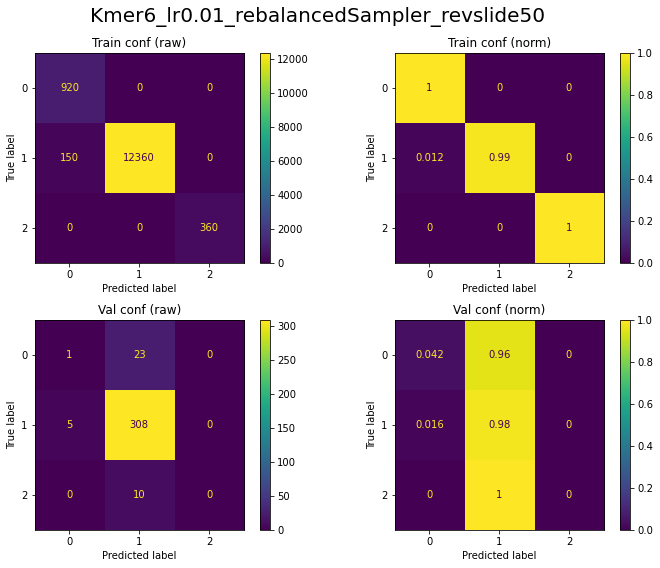

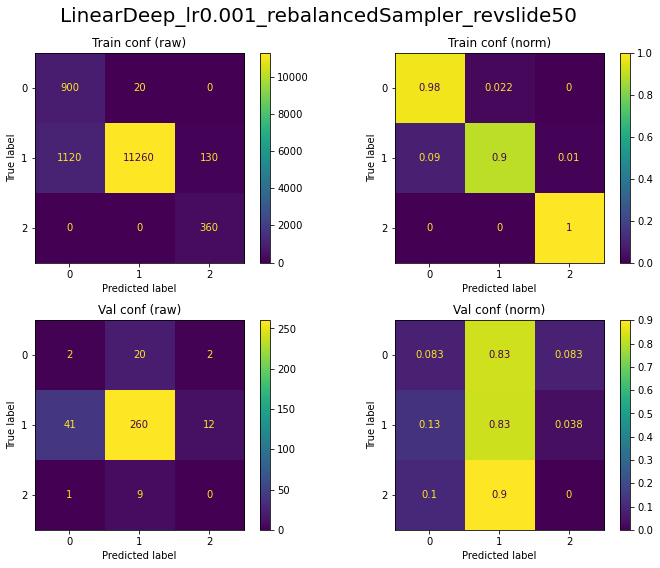

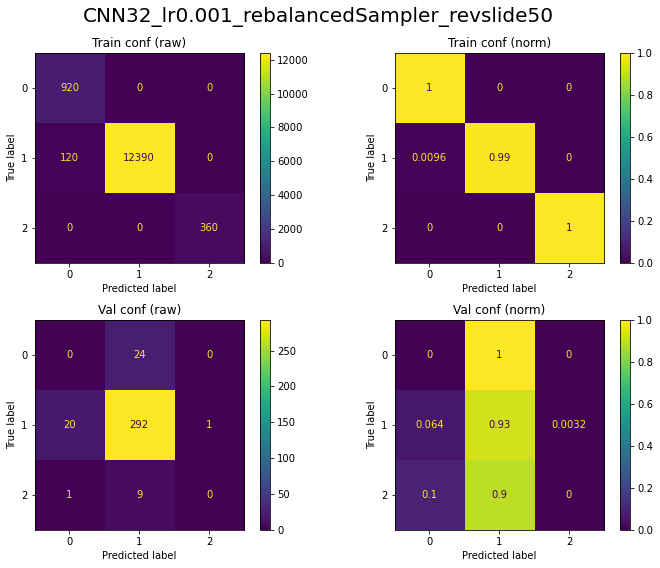

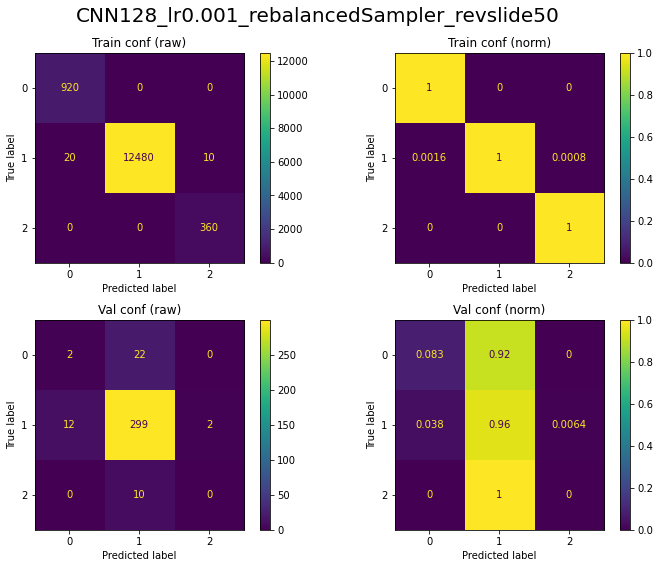

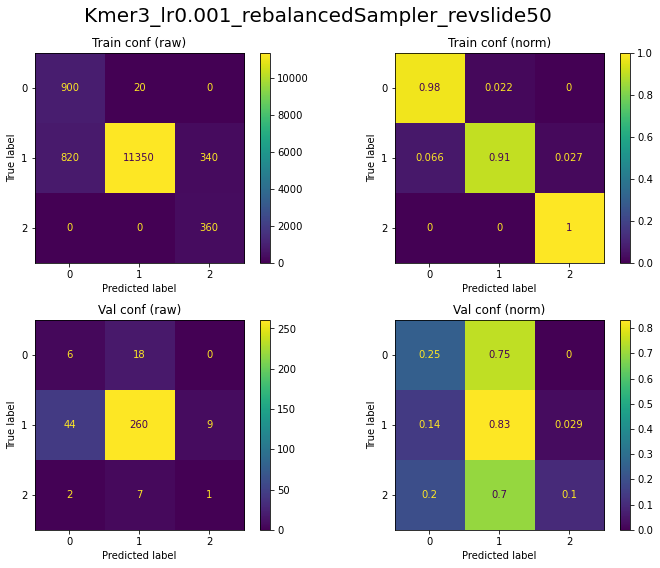

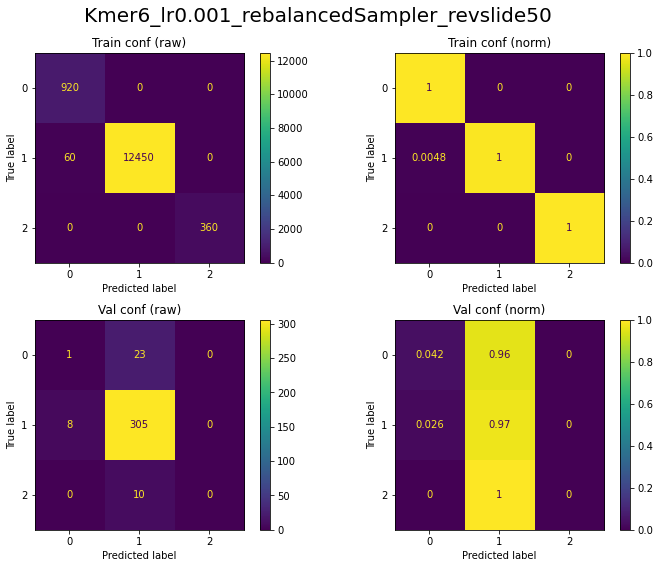

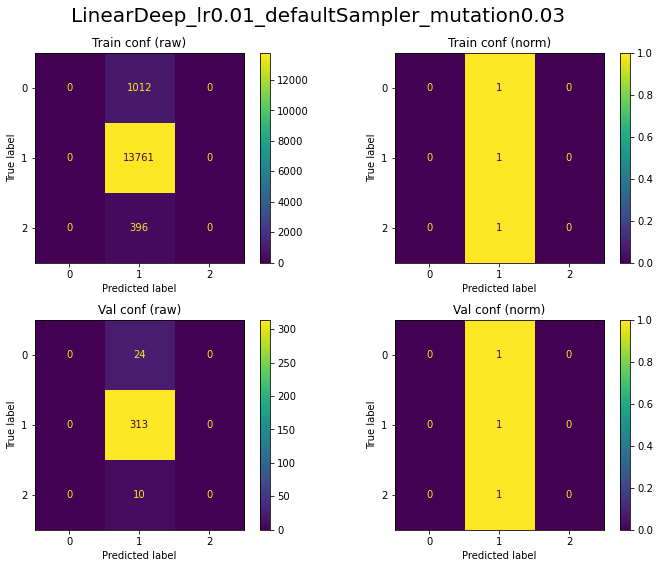

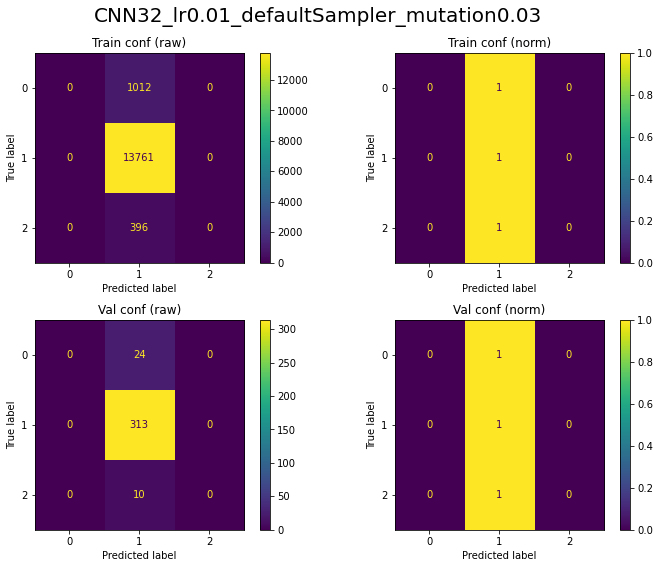

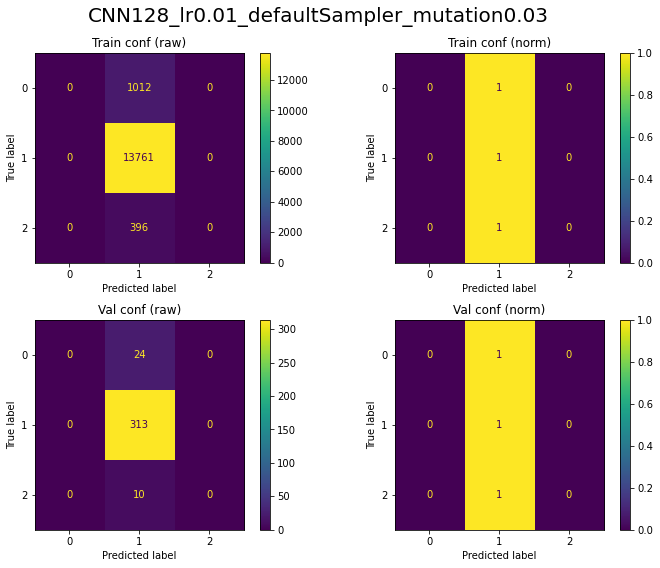

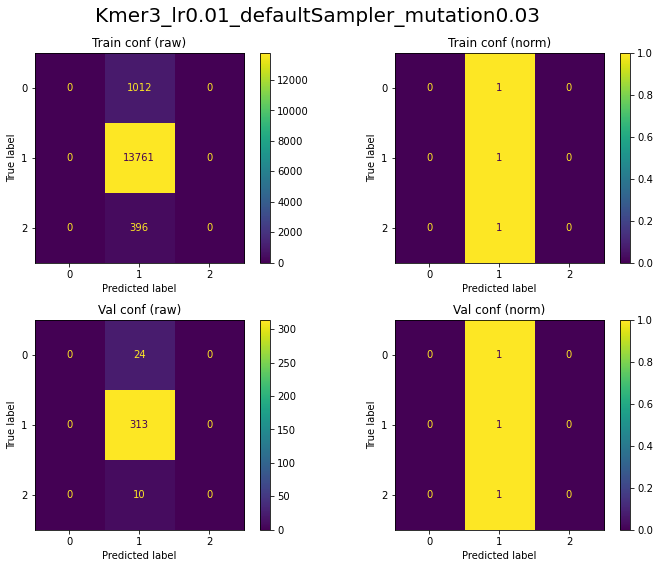

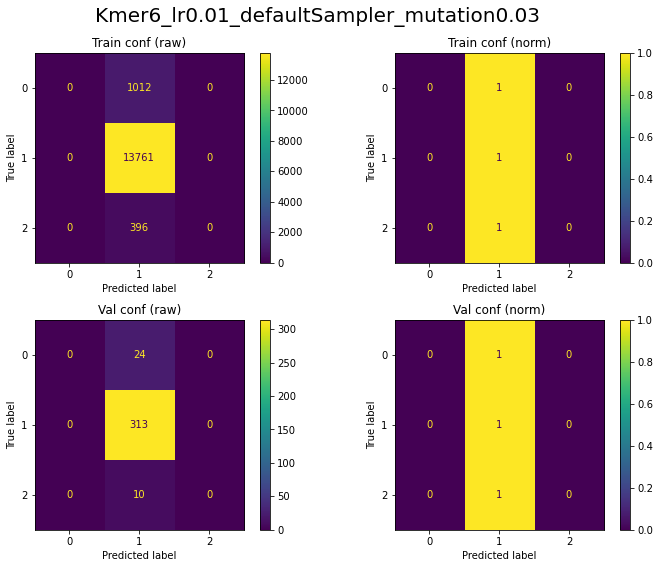

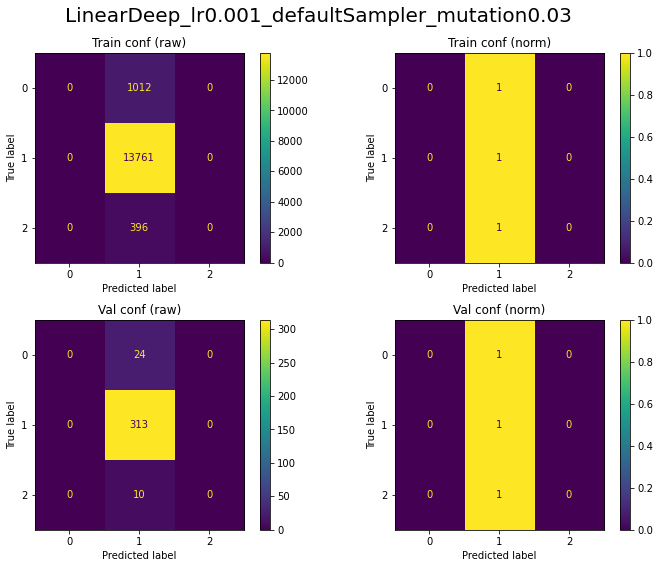

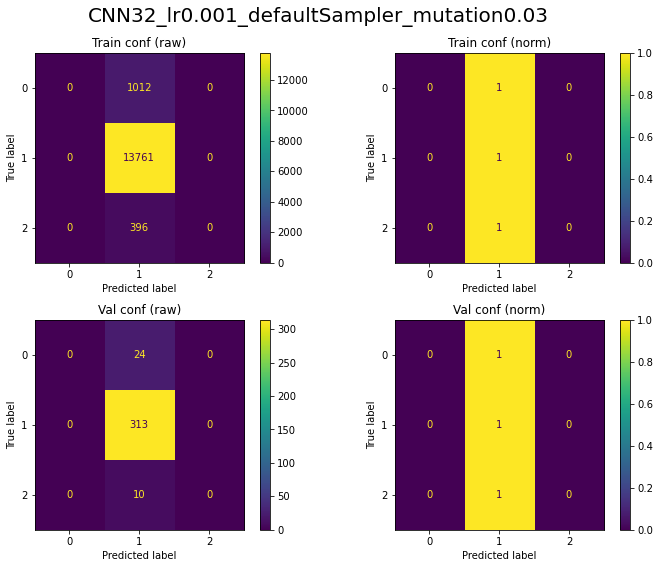

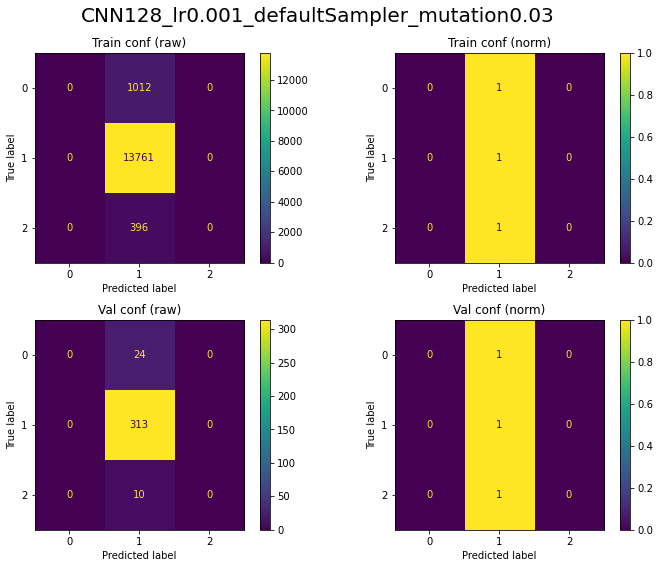

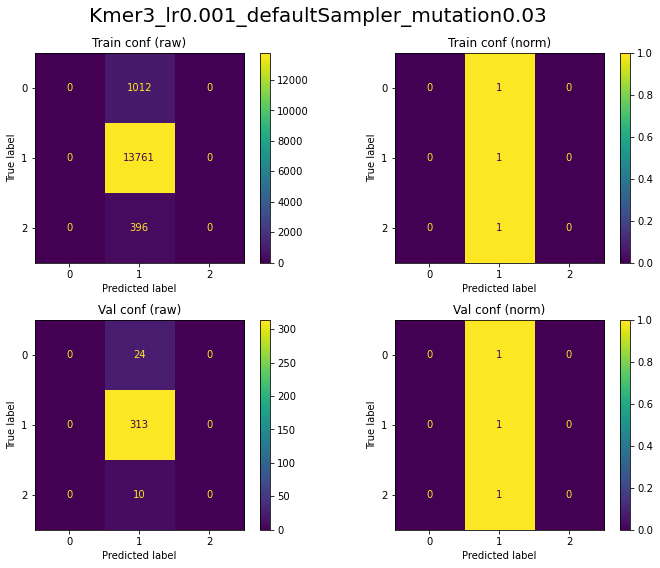

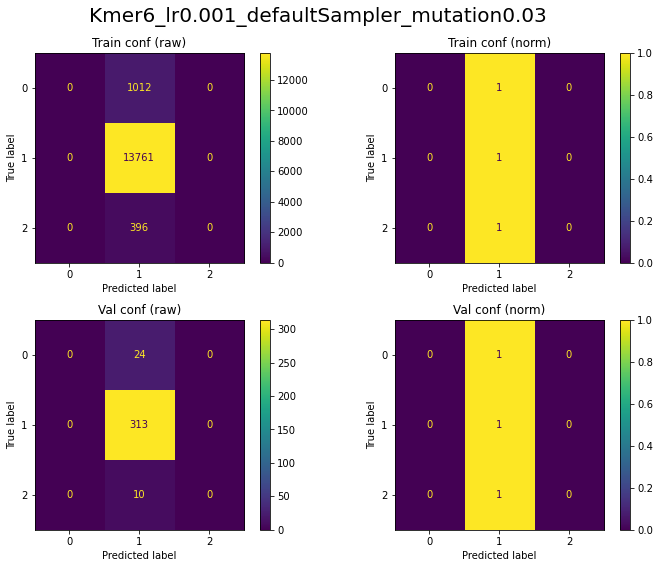

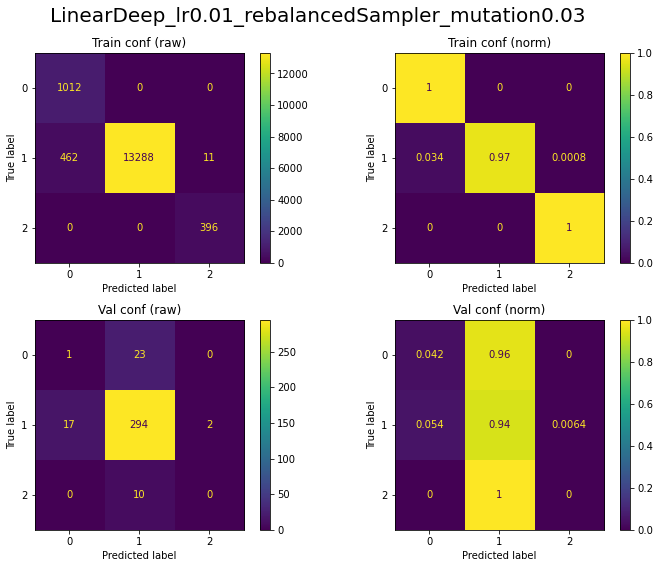

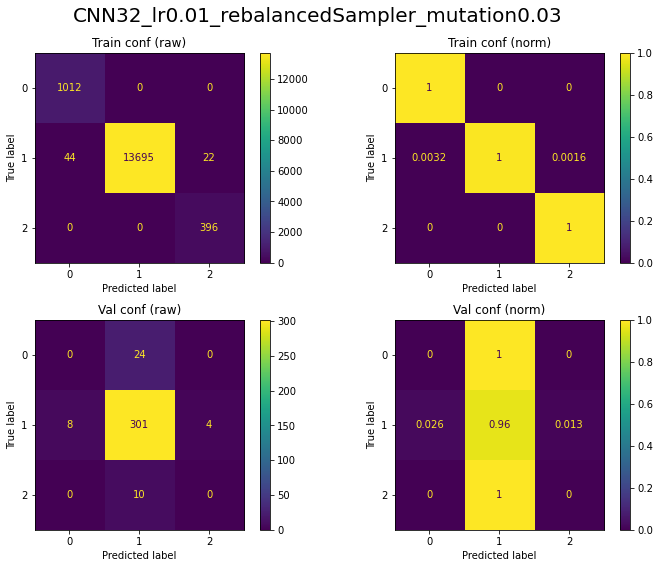

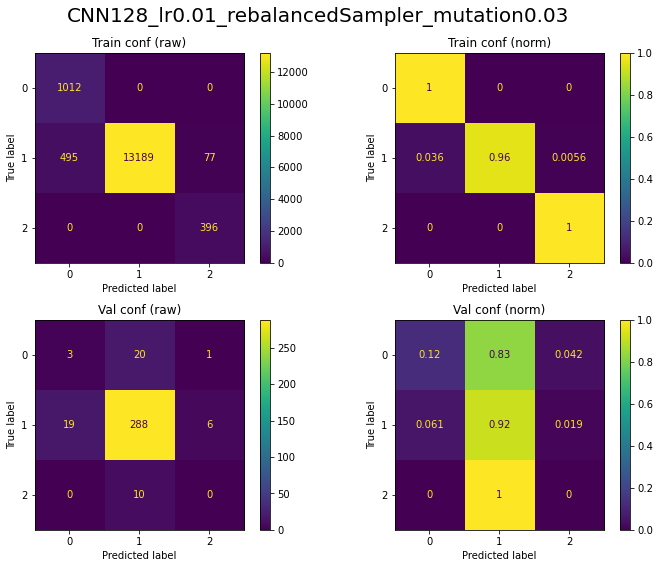

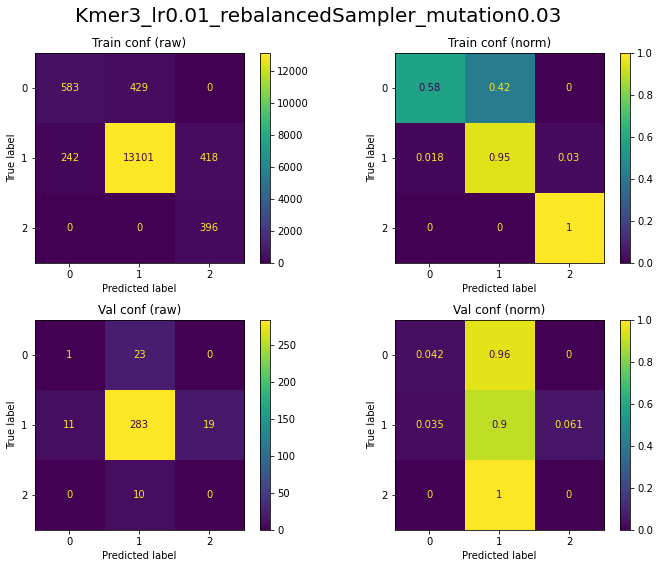

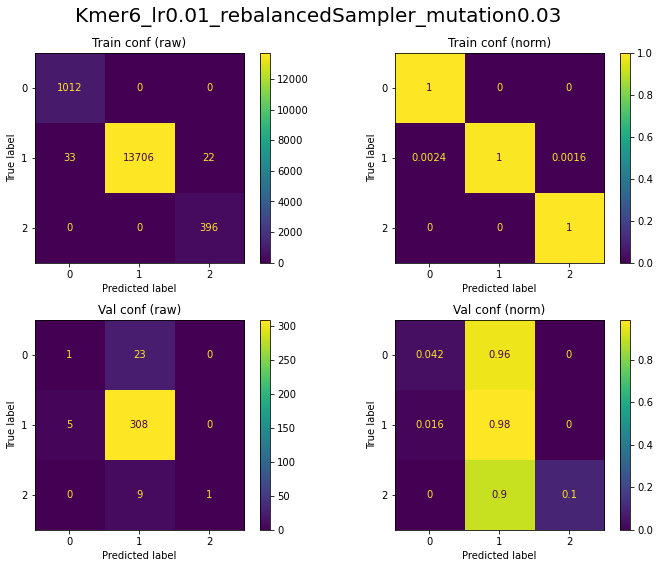

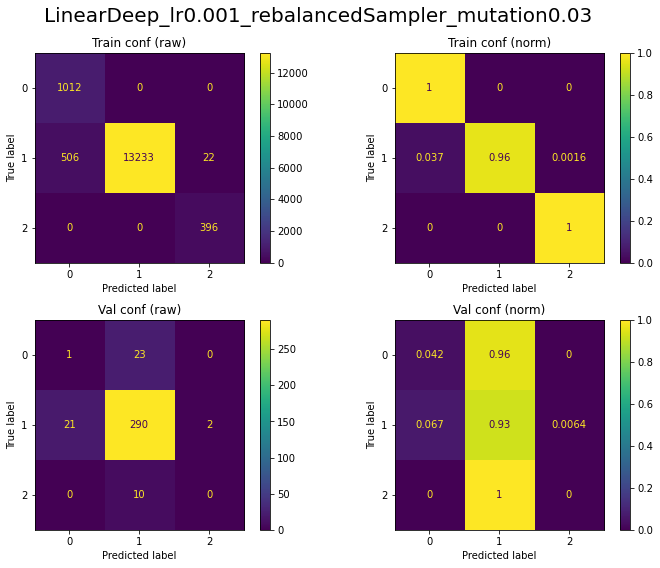

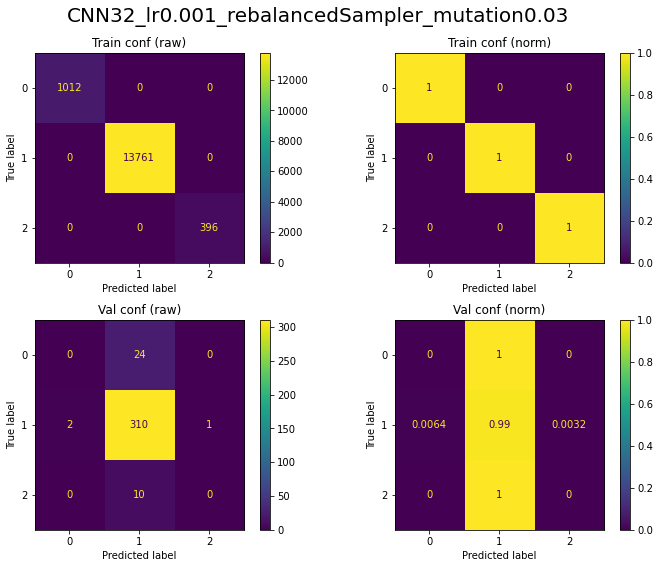

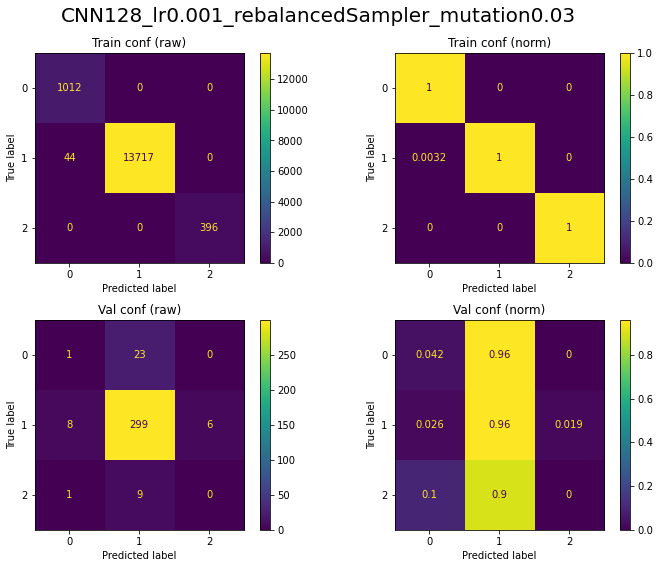

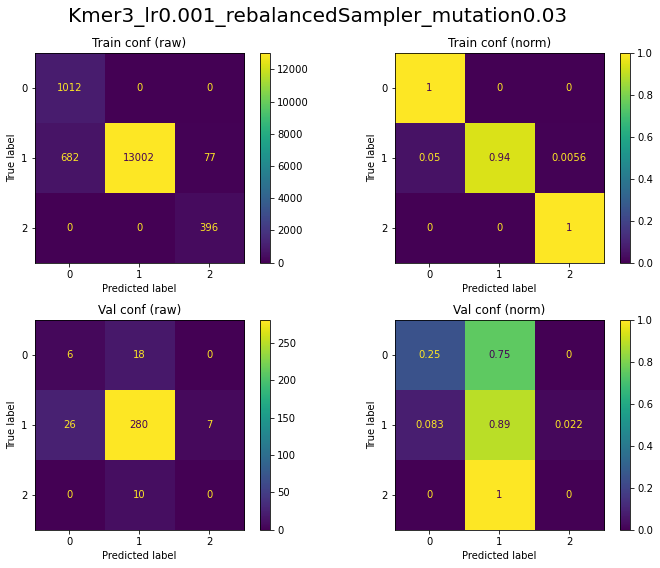

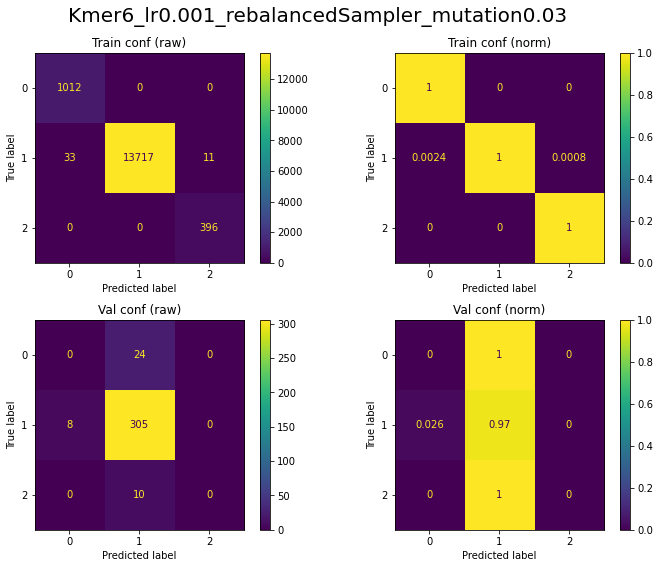

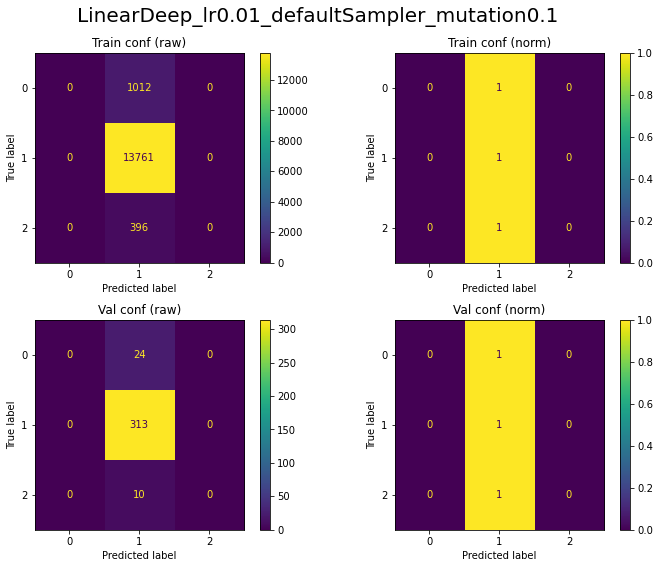

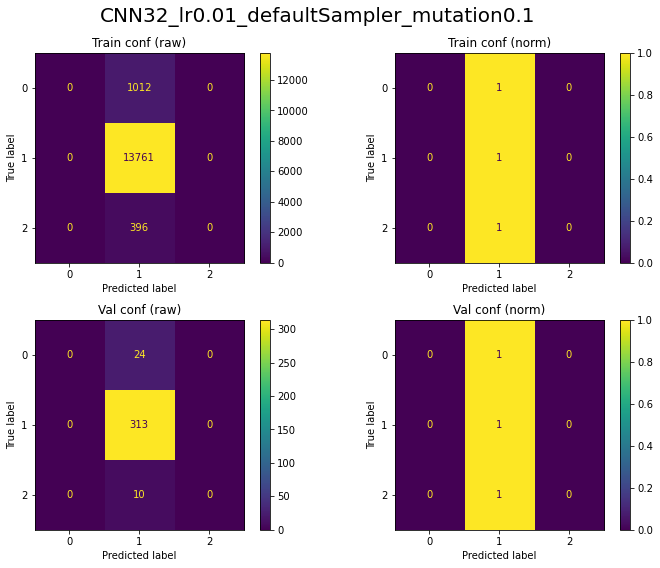

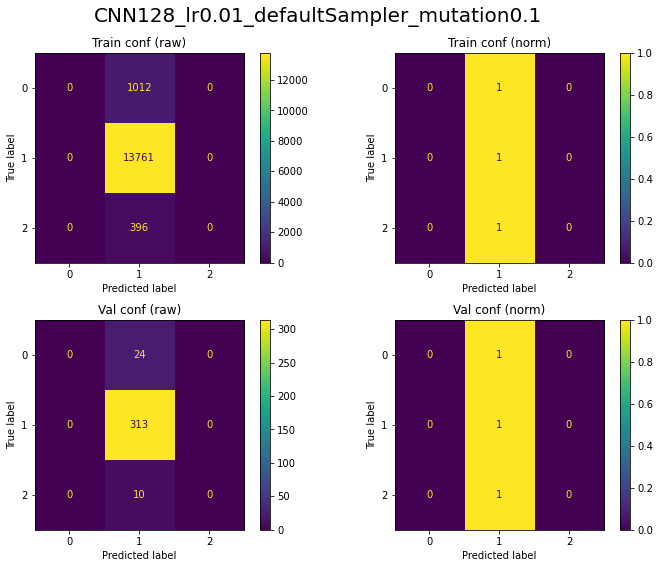

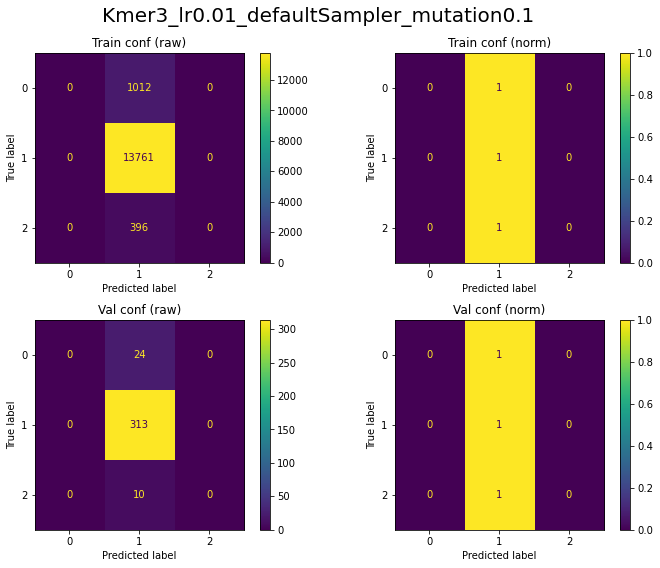

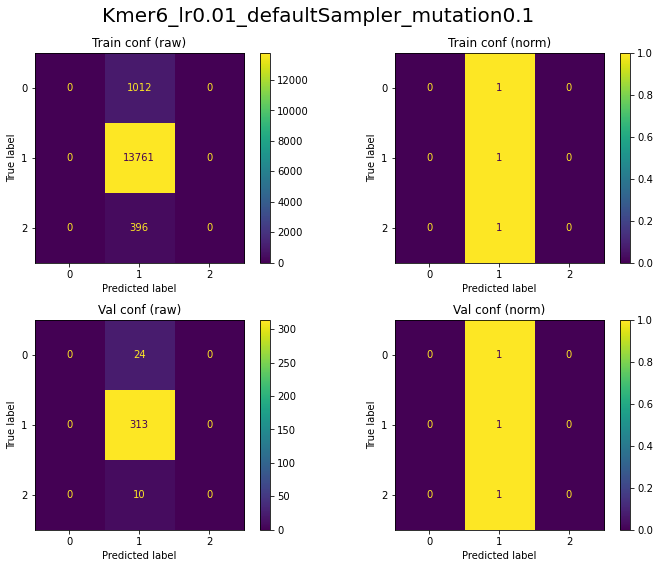

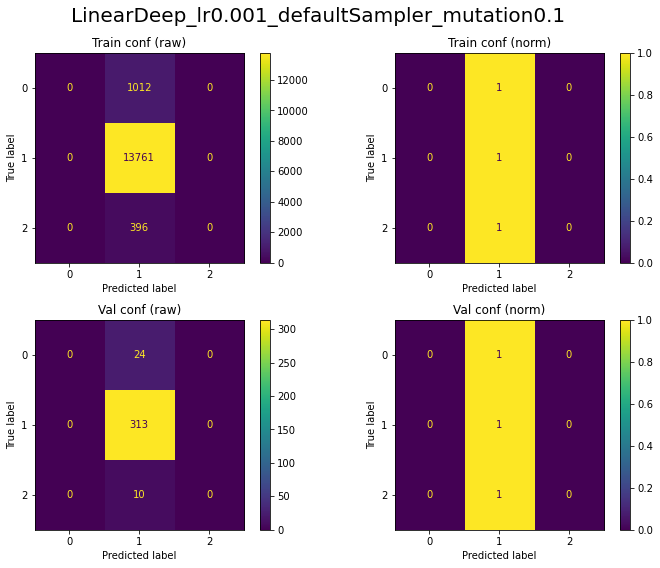

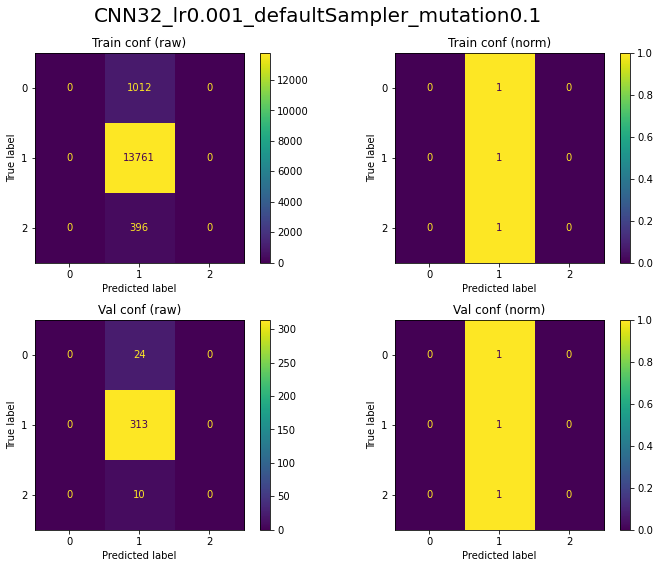

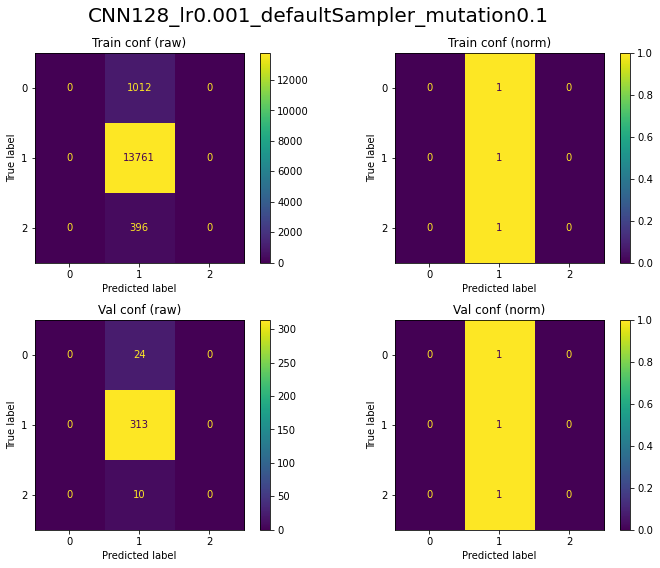

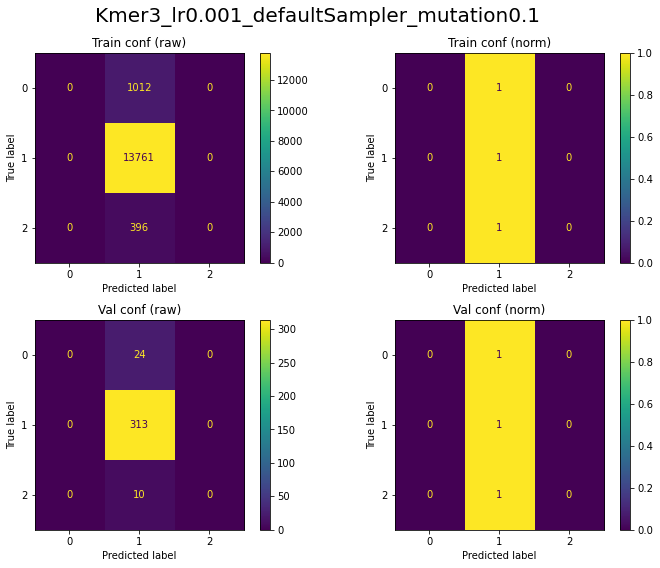

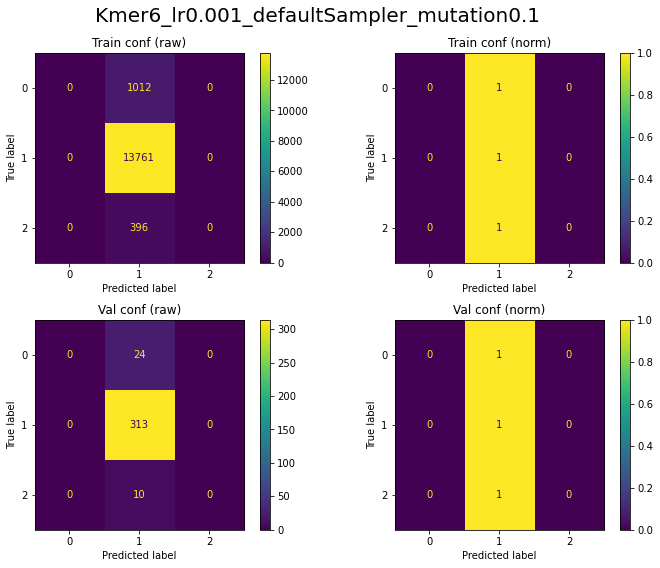

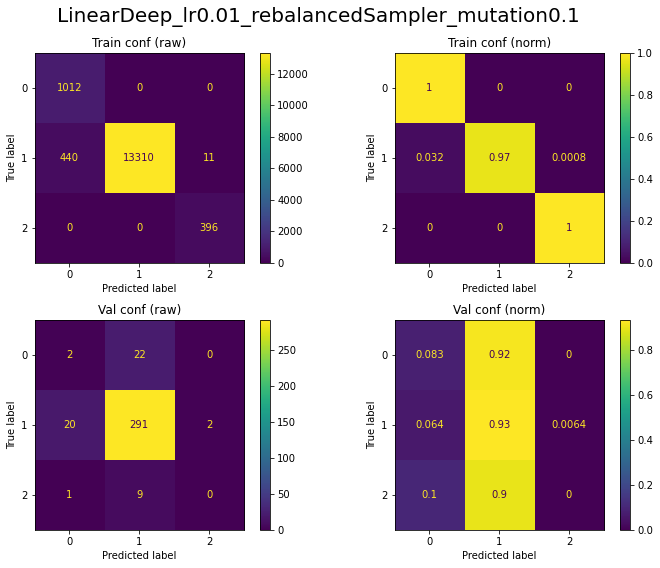

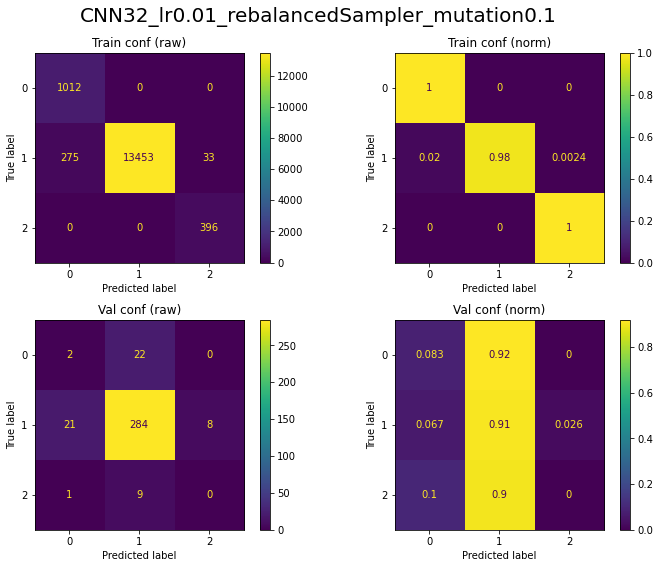

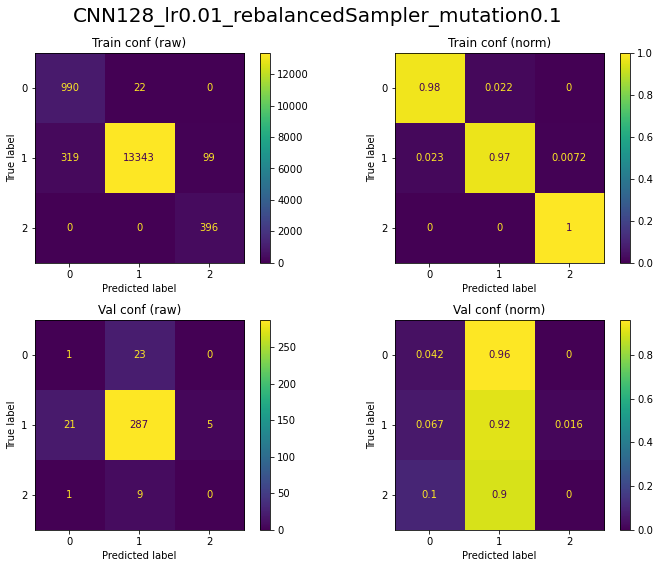

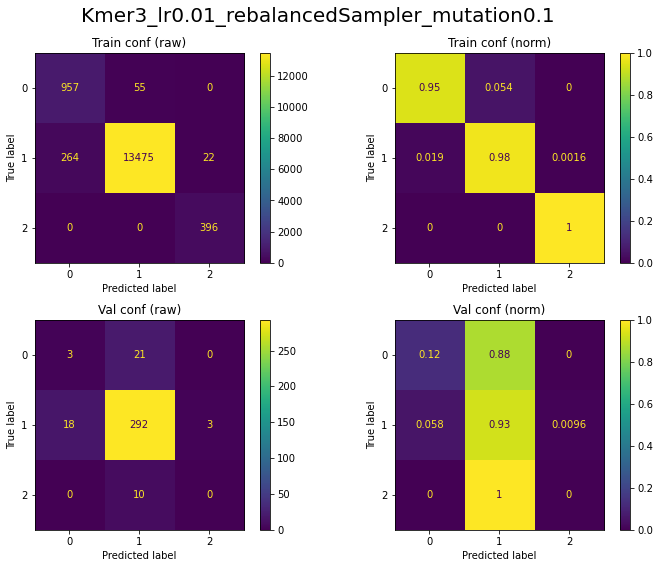

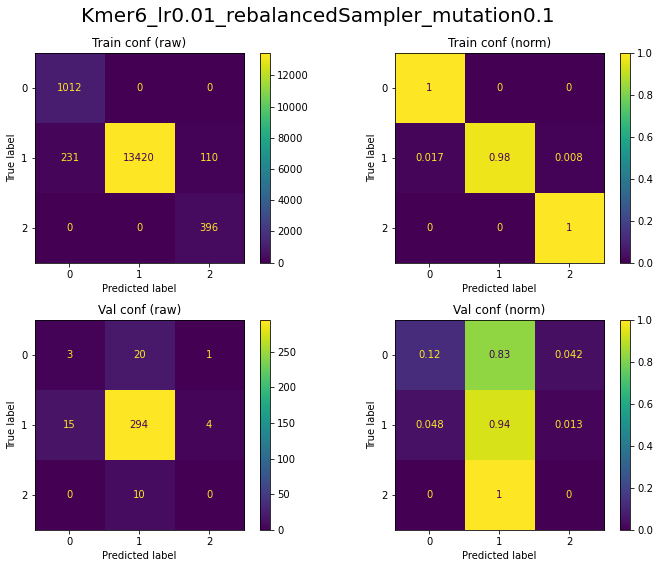

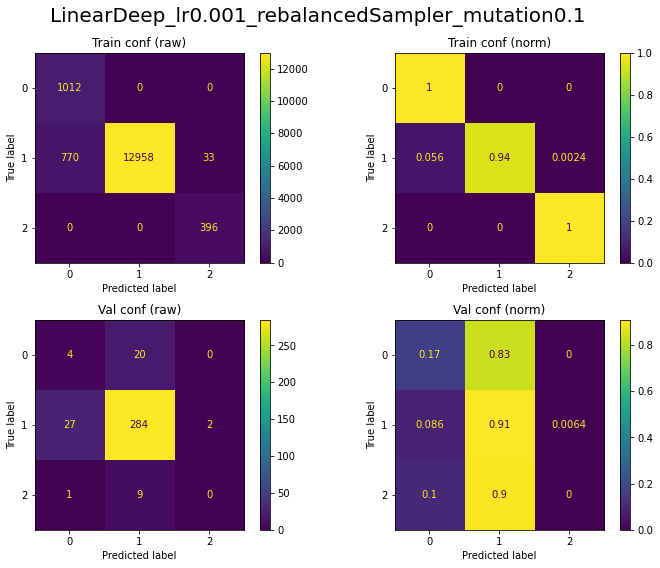

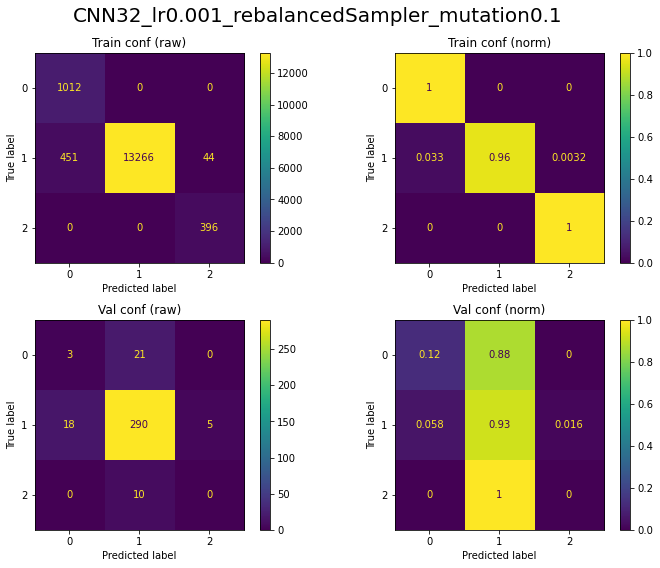

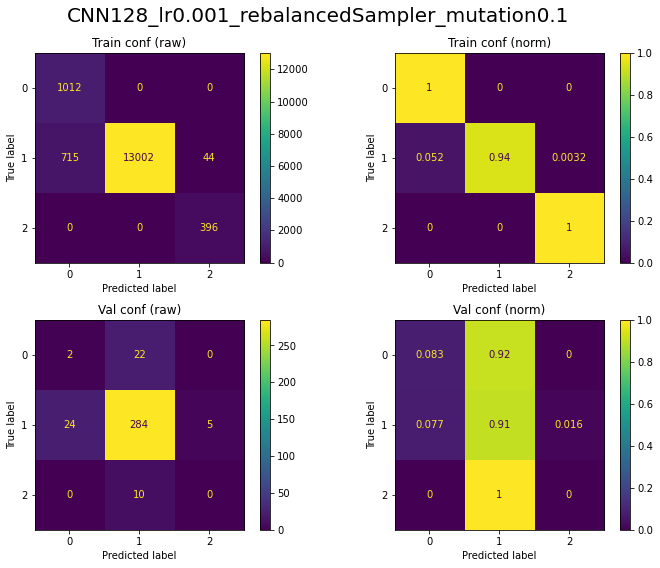

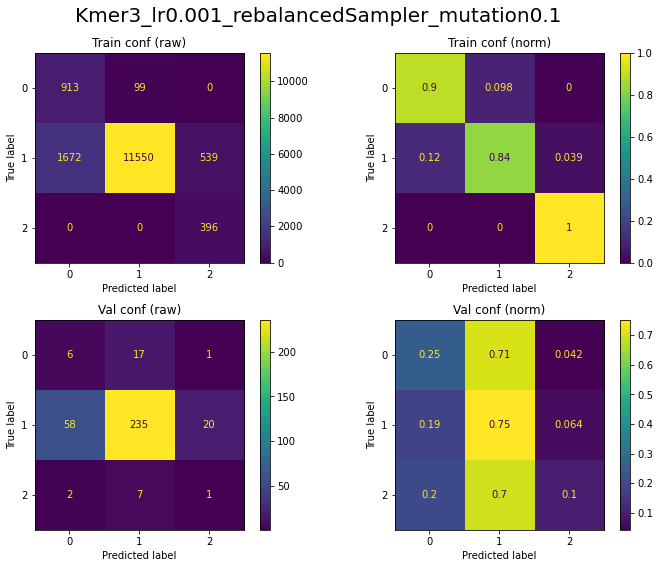

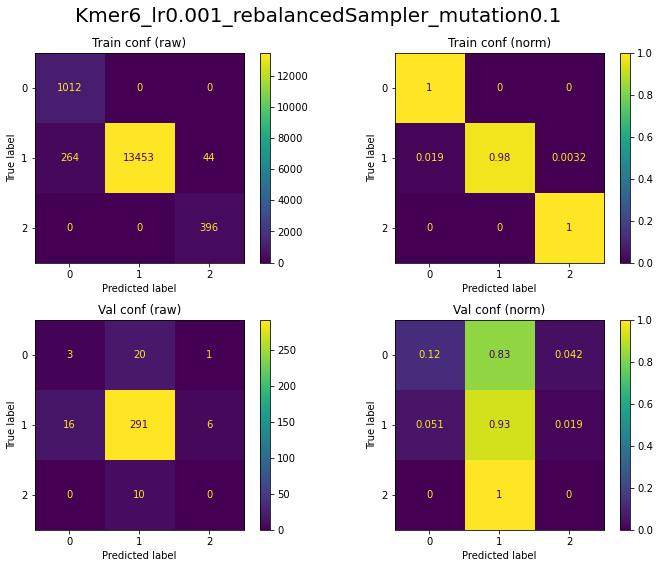

In [166]:
for m in loss_dict1.keys():
    train_f = f'pipe0/conf_dfs/{m}_train_conf_df.tsv'
    val_f = f'pipe0/conf_dfs/{m}_val_conf_df.tsv'
    train_df = pd.read_csv(train_f,sep='\t')
    val_df = pd.read_csv(val_f,sep='\t')
    
    dfs = [(train_df,"Train"),(val_df,"Val")]
    plot_conf_matrix_paired(dfs, m)

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


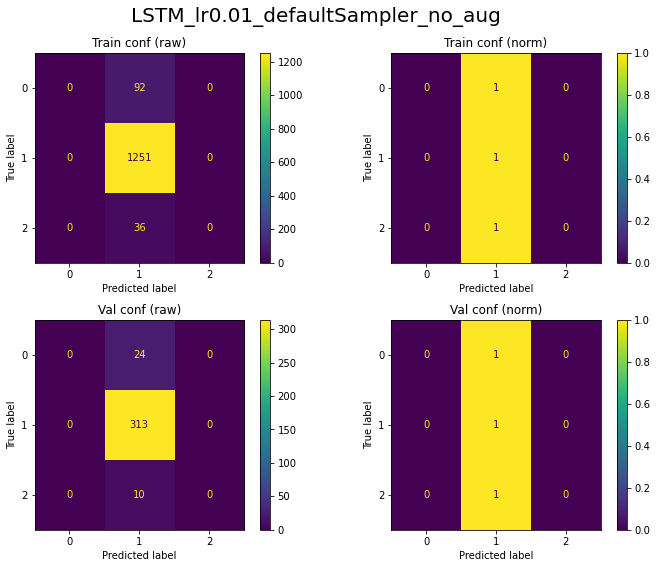

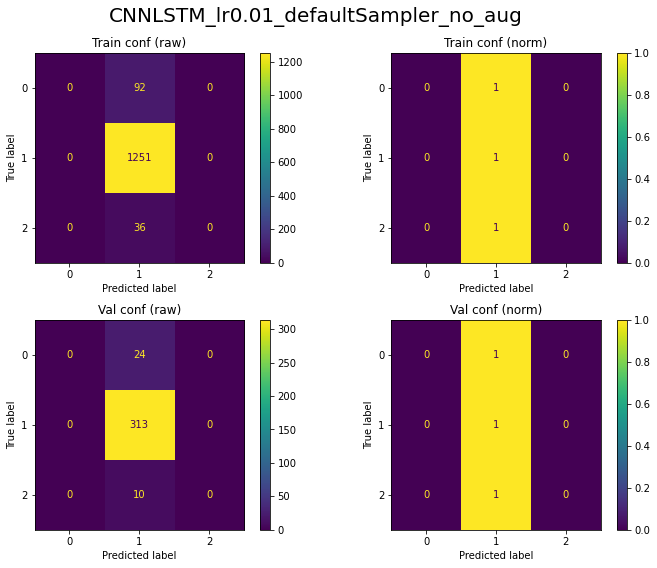

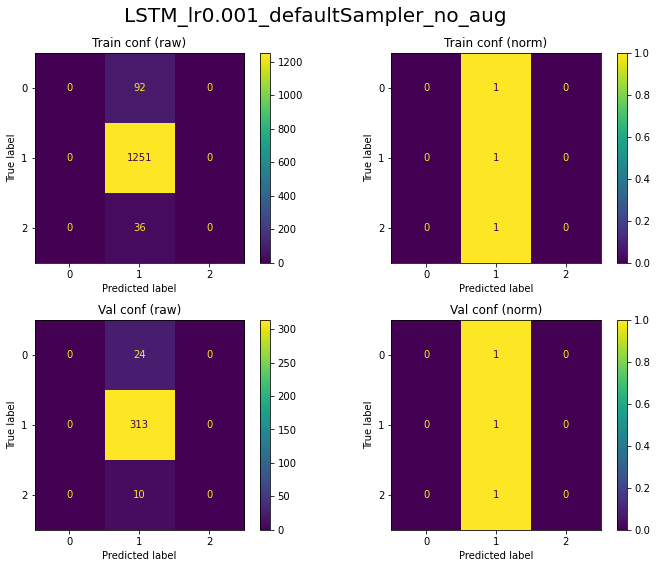

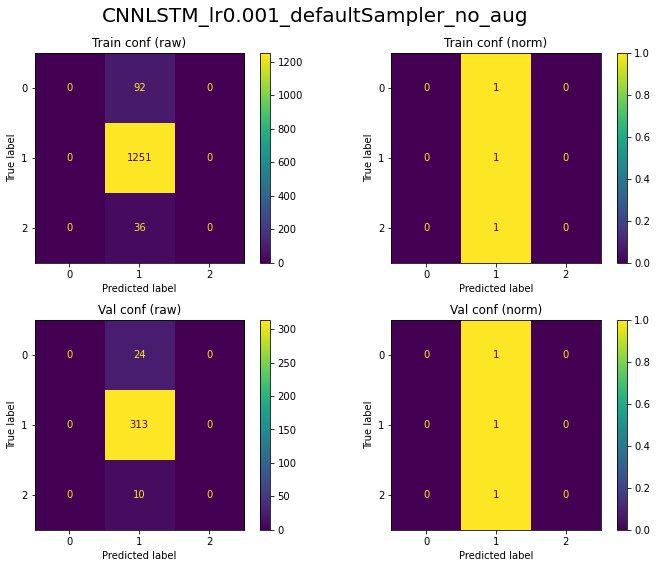

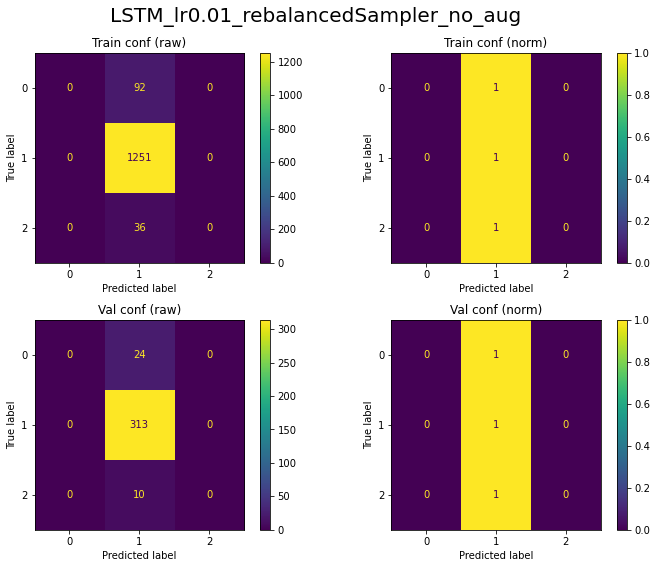

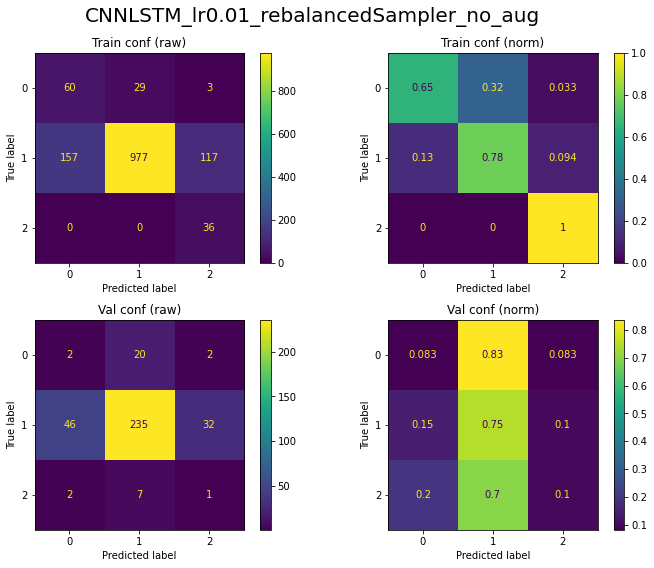

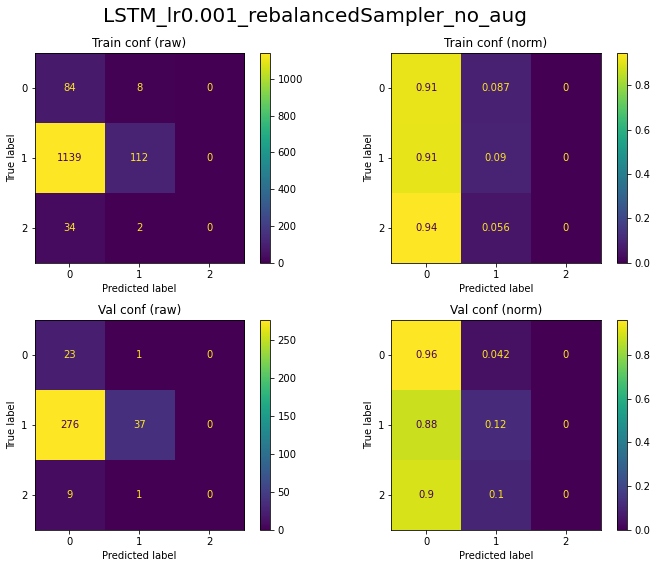

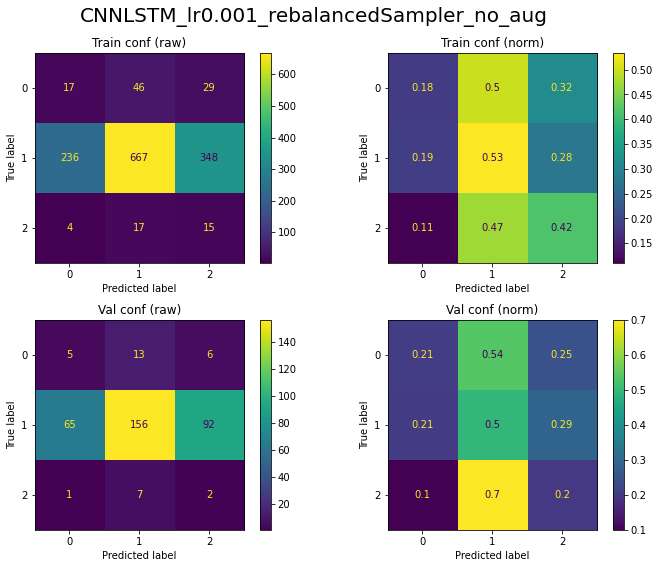

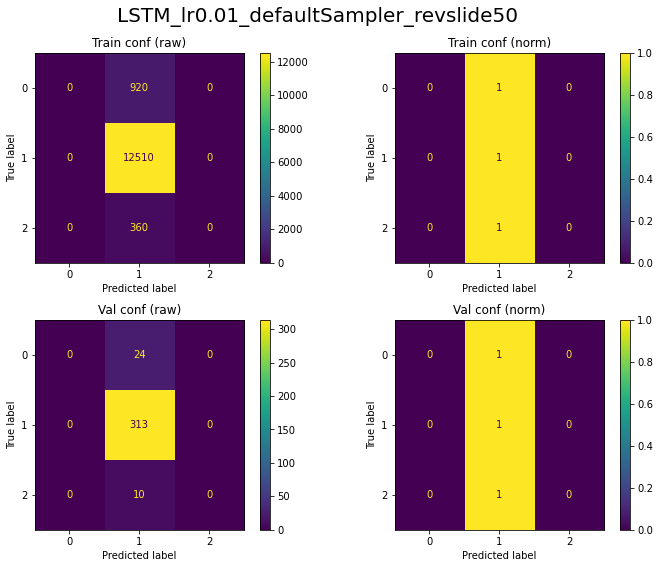

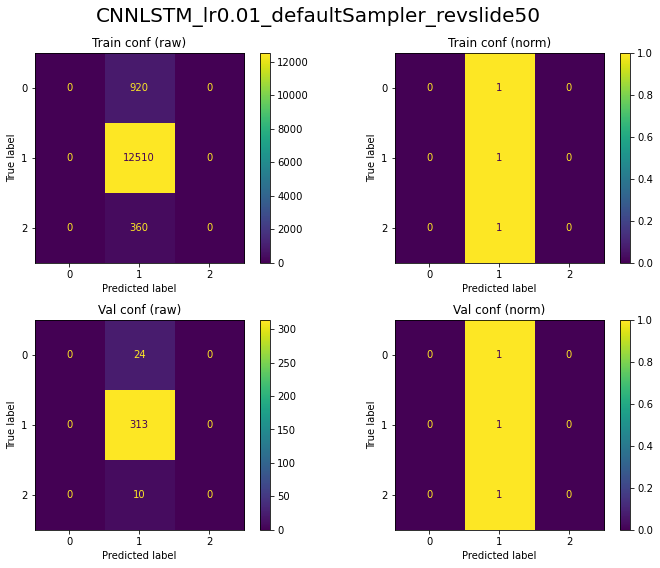

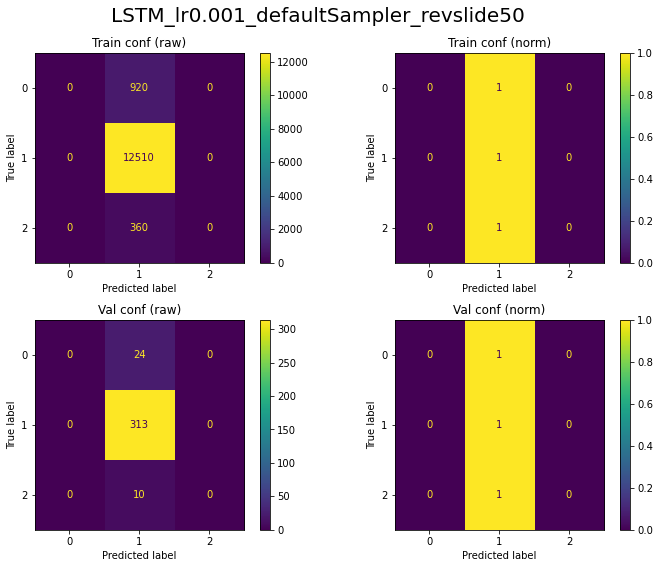

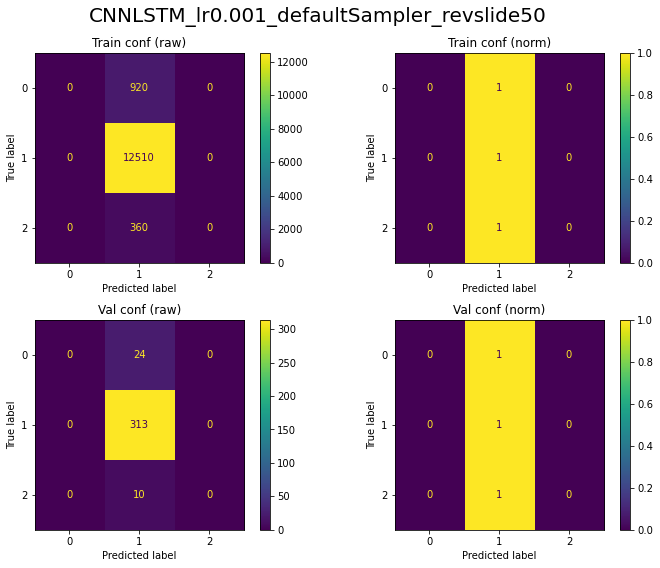

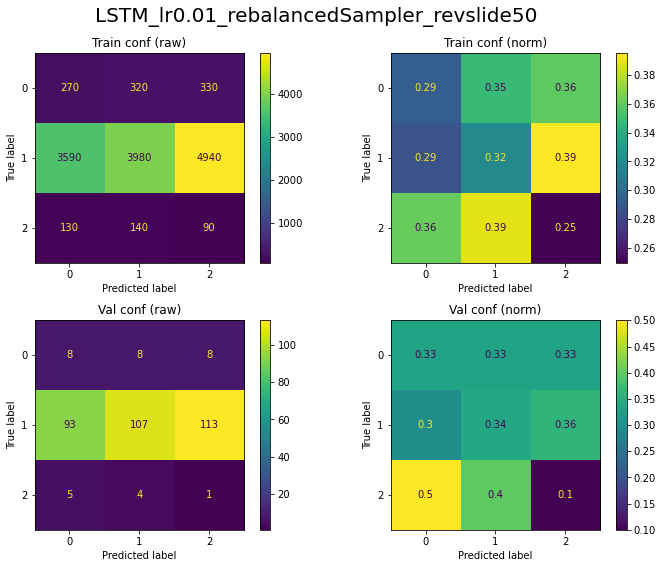

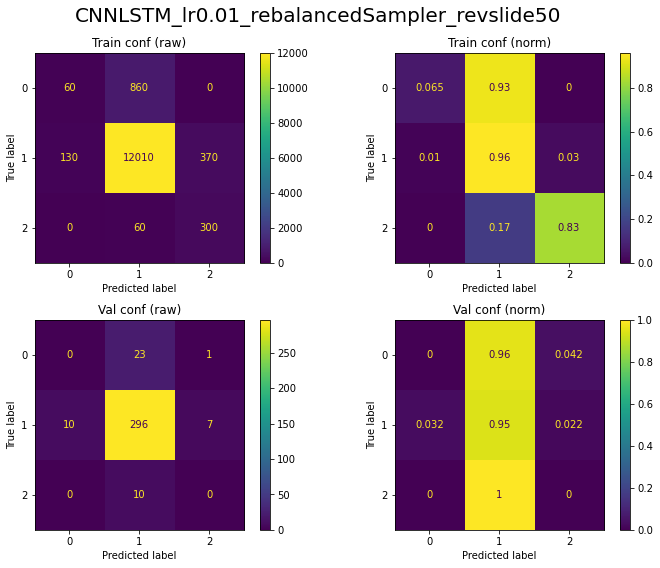

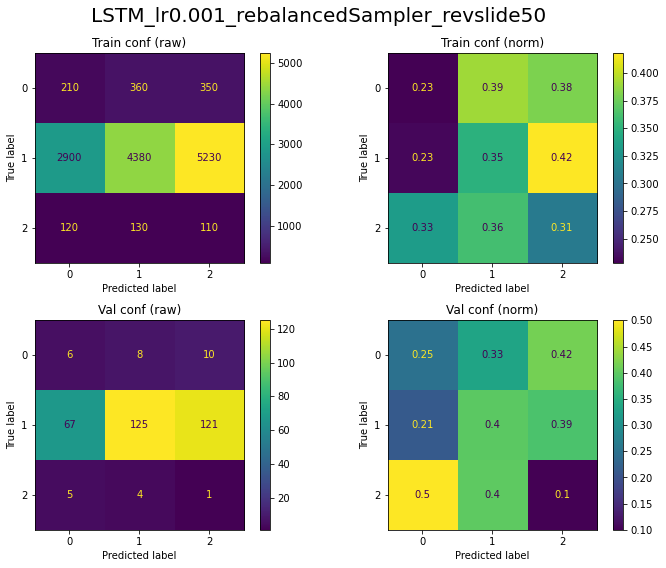

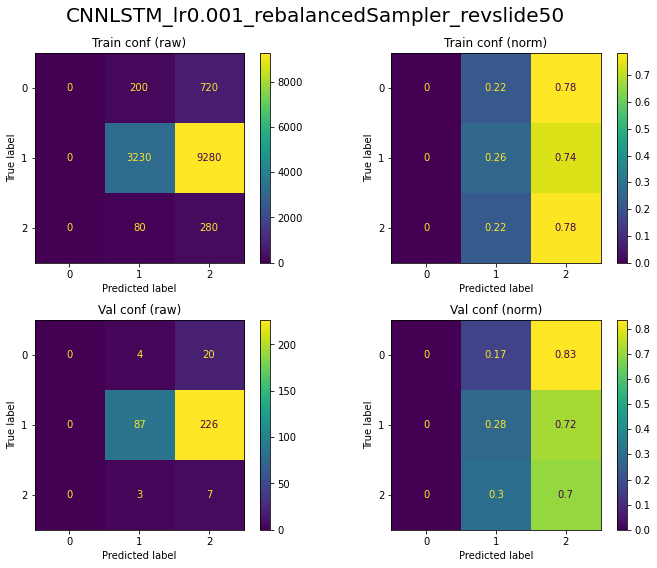

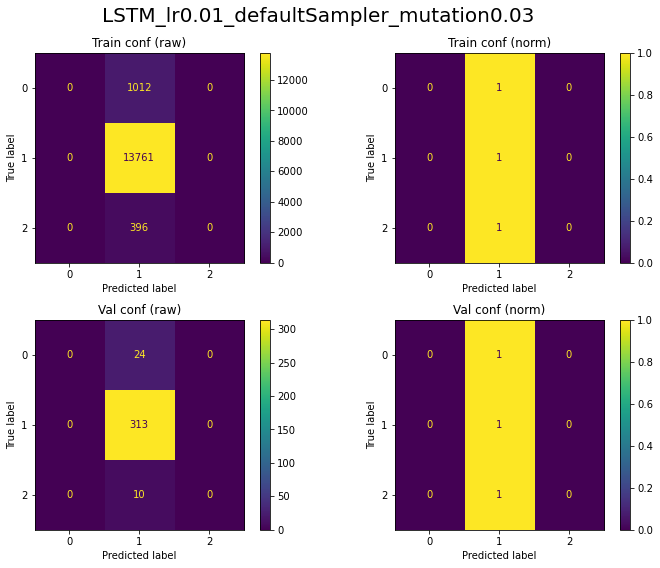

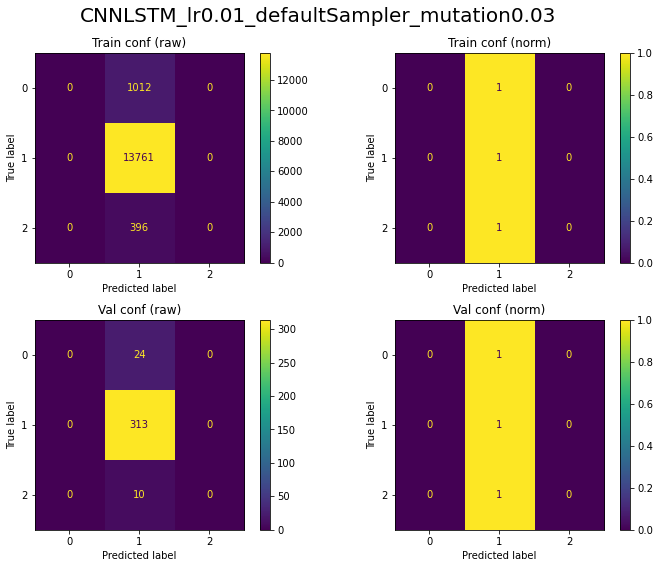

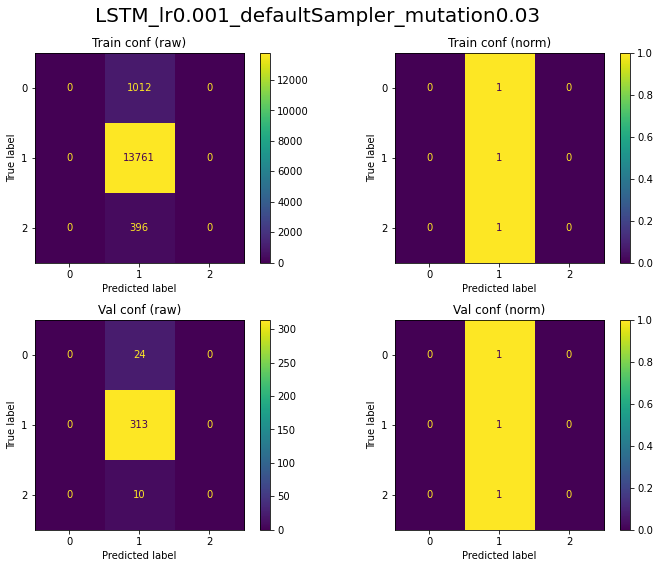

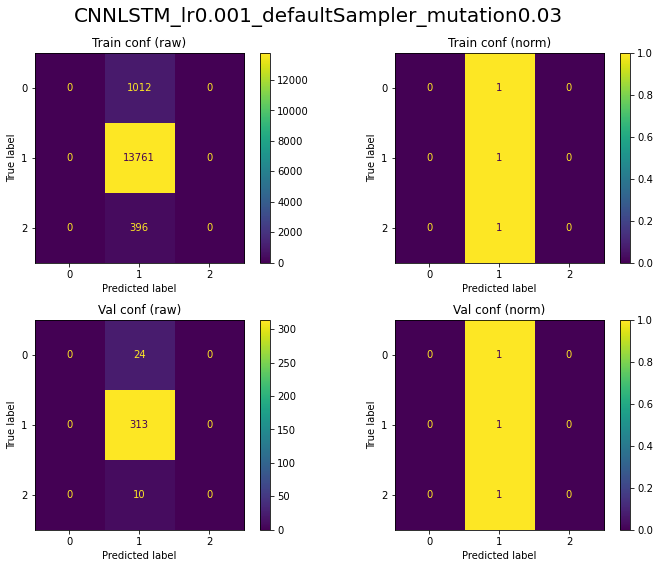

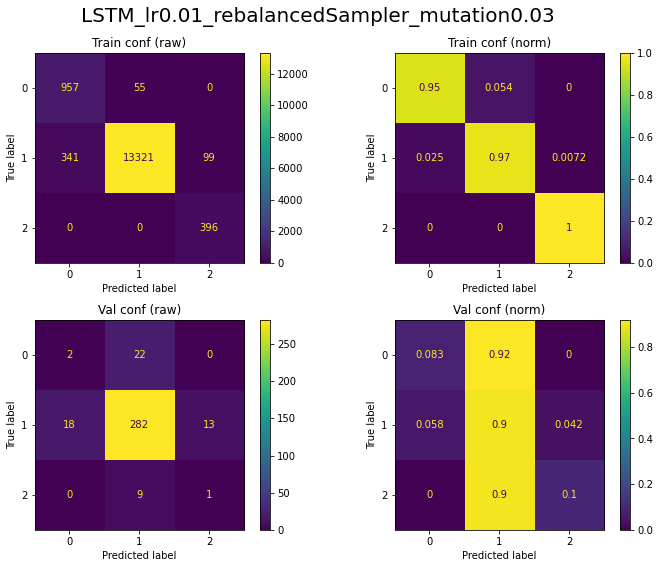

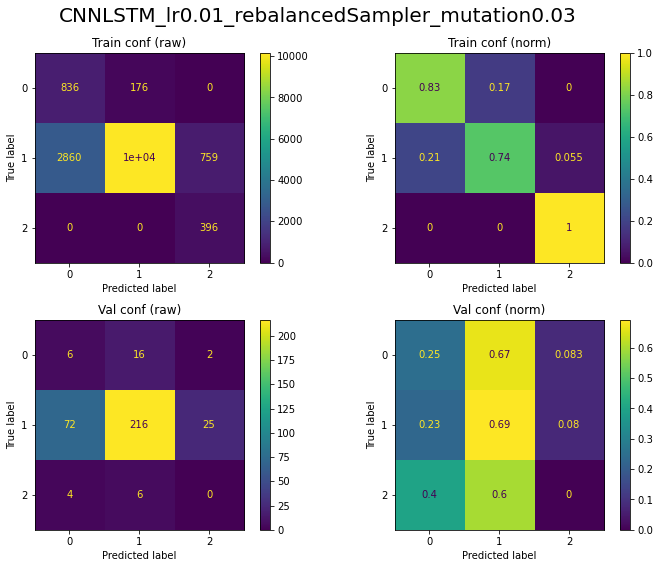

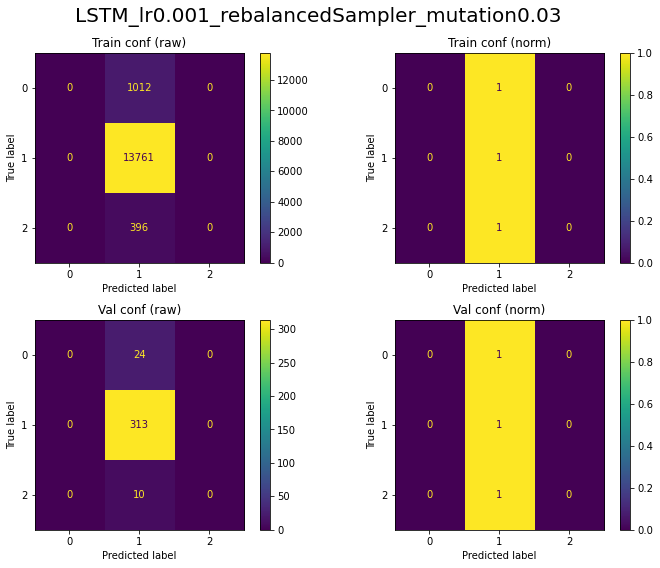

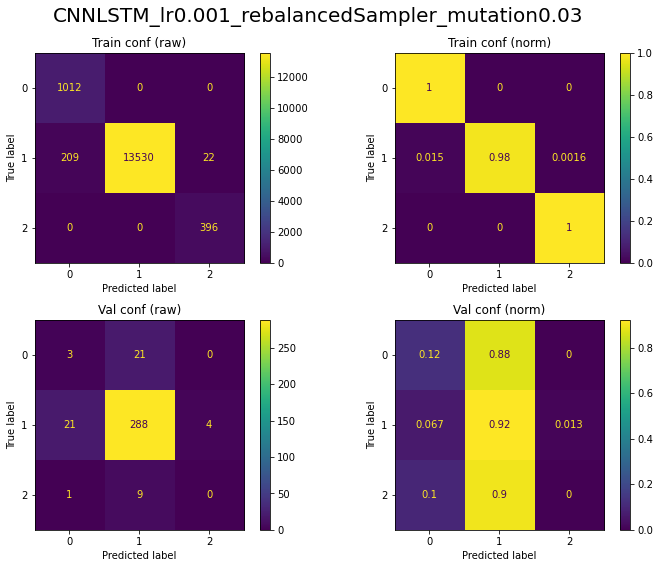

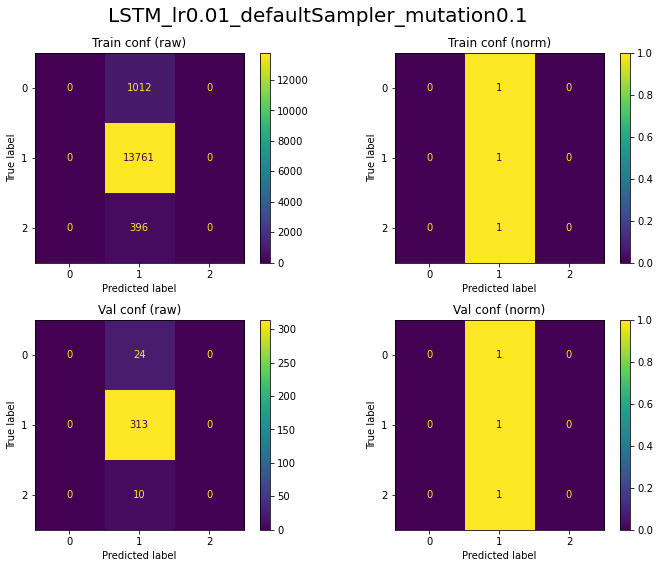

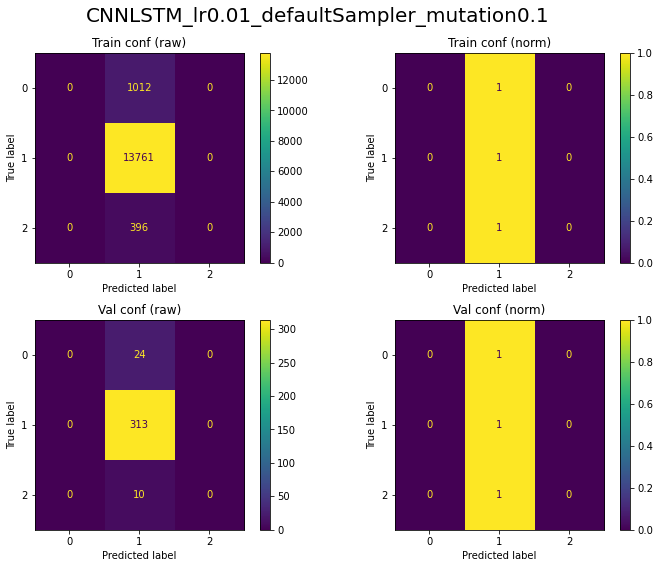

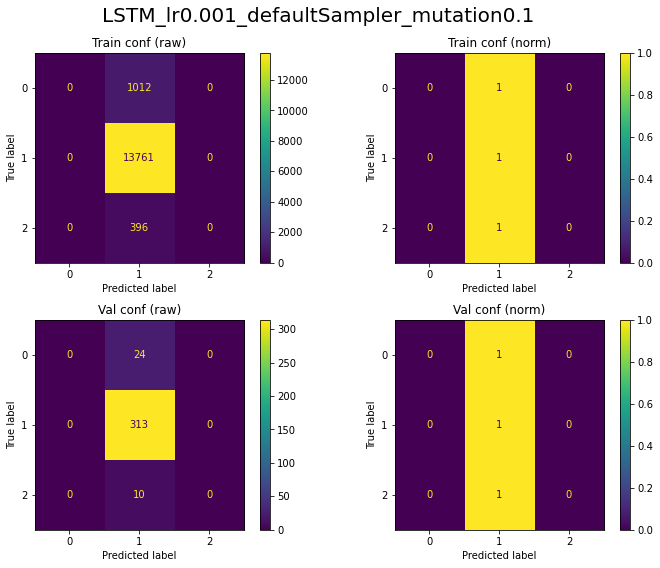

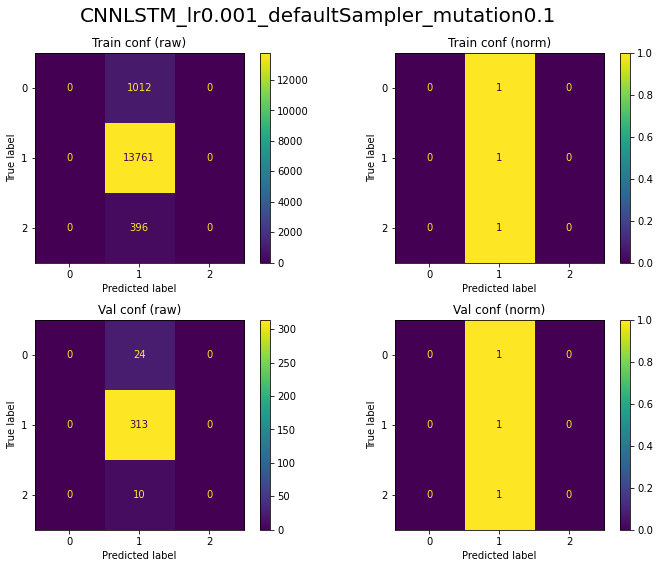

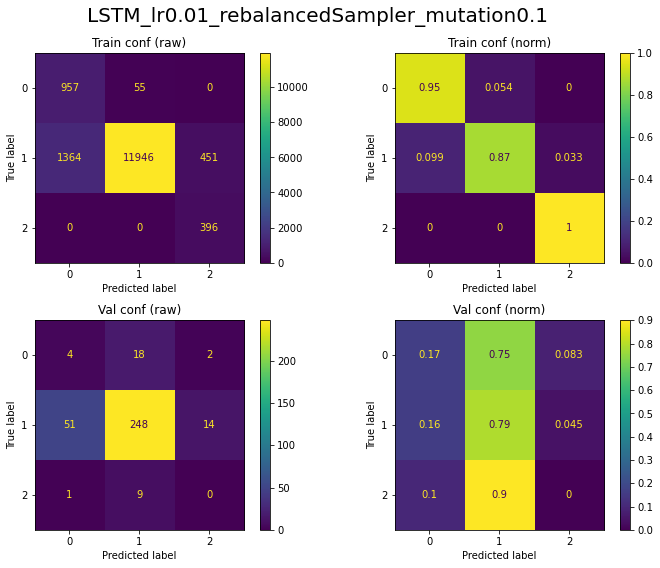

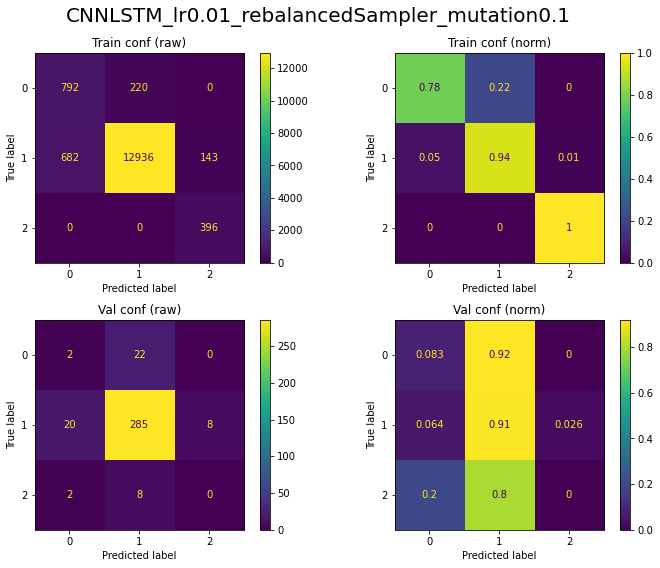

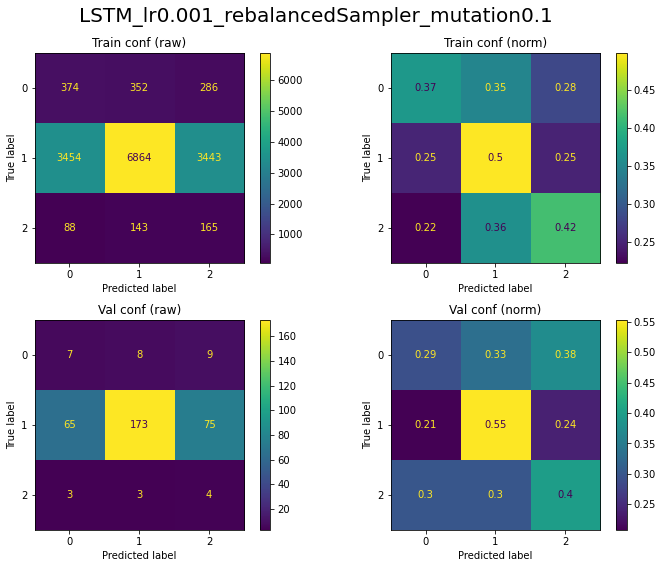

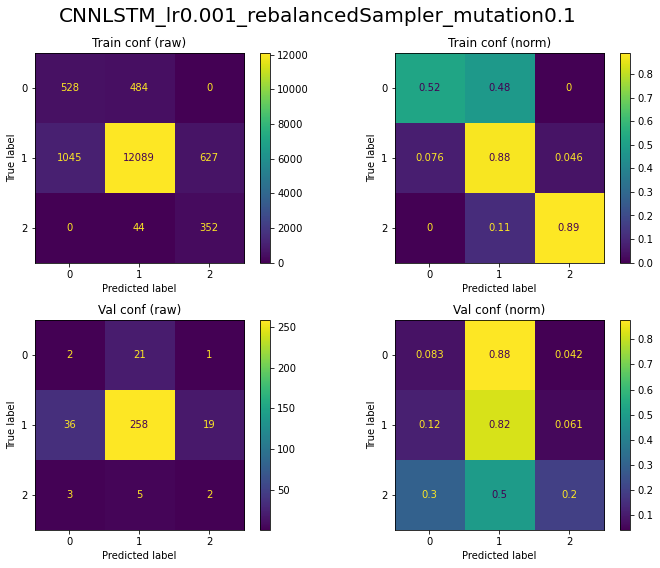

In [168]:
for m in loss_dict2.keys():
    train_f = f'pipe1/conf_dfs/{m}_train_conf_df.tsv'
    val_f = f'pipe1/conf_dfs/{m}_val_conf_df.tsv'
    train_df = pd.read_csv(train_f,sep='\t')
    val_df = pd.read_csv(val_f,sep='\t')
    
    dfs = [(train_df,"Train"),(val_df,"Val")]
    plot_conf_matrix_paired(dfs, m)